In [1]:
from scipy.integrate import odeint
from scipy.optimize import minimize_scalar,minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from scipy import stats
from multiprocessing import Process,Queue,Pool
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500
import pickle as pkl
import importlib
from matplotlib.backends.backend_pdf import PdfPages
import sys
sys.path.append("../src/")
from flux_finding_mp import *
rd.seed(1000)
np.random.seed(1000)
from functools import partial
import seaborn as sb
from sklearn.metrics import r2_score

In [2]:
import scipy 
scipy.__version__

'1.7.1'

In [3]:
numCores = 10
numBestFitIters = 10
numSims = 100
ts = np.linspace(0,50,100)

In [23]:
data,lacE,glycolysis,fluxes,conc,c0s,vhvds = generateSyntheticData(ts,0.00)
print(conc)
print(vhvds)
data

{'Lactate': 0.056293434838034506, 'G3P': 0.4790423739221892, 'Malate': 0.3805789998718001, 'NADH': 0.833176402151073}
{'vhvd_nadh_ldh': 67.31971522049001, 'vhvd_nadh_mas': 5.117664721227551, 'vhvd_gap_gapdh': 6.311680729348055, 'vhvd_nadh_g3ps': 2.474350791499015, 'vhvd_dhap_g3ps': 2.4185629454084365, 'vhvd_nadh_dhap_g3ps': 10.398659201787034}


,UL_lac,UL_g3p,UL_malate,UL_nadh,UL_gap,L_lac,L_malate,L_nadh,L_gap,L_g3p_M+1,L_g3p_M+2
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.999998,0.990510,0.999998,0.998126,0.482771,0.000002,0.000002,0.001874,0.517229,0.009491,0.000003
2,0.999990,0.972392,0.999990,0.994373,0.304507,0.000010,0.000010,0.005627,0.695493,0.027592,0.000020
3,0.999974,0.952903,0.999973,0.990078,0.243068,0.000026,0.000027,0.009922,0.756932,0.047040,0.000059
4,0.999952,0.934386,0.999946,0.985700,0.221893,0.000048,0.000054,0.014300,0.778107,0.065496,0.000120
...,...,...,...,...,...,...,...,...,...,...,...
95,0.998811,0.782750,0.988813,0.870059,0.210757,0.001189,0.011187,0.129941,0.789243,0.210340,0.006909
96,0.998809,0.782763,0.988724,0.869909,0.210757,0.001191,0.011276,0.130091,0.789243,0.210315,0.006922
97,0.998807,0.782775,0.988636,0.869764,0.210757,0.001193,0.011364,0.130236,0.789243,0.210291,0.006934
98,0.998806,0.782787,0.988550,0.869624,0.210757,0.001194,0.011450,0.130376,0.789243,0.210267,0.006946


[0.74295635 0.91577056 0.68379654 0.5967945 ]
0.061363898276027035 0.4416416945312318
[0.02062448 0.07510689 0.00872359 0.0654154 ]
{'Lactate': 0.056293434838034506, 'G3P': 0.4790423739221892, 'Malate': 0.3805789998718001, 'NADH': 0.833176402151073}


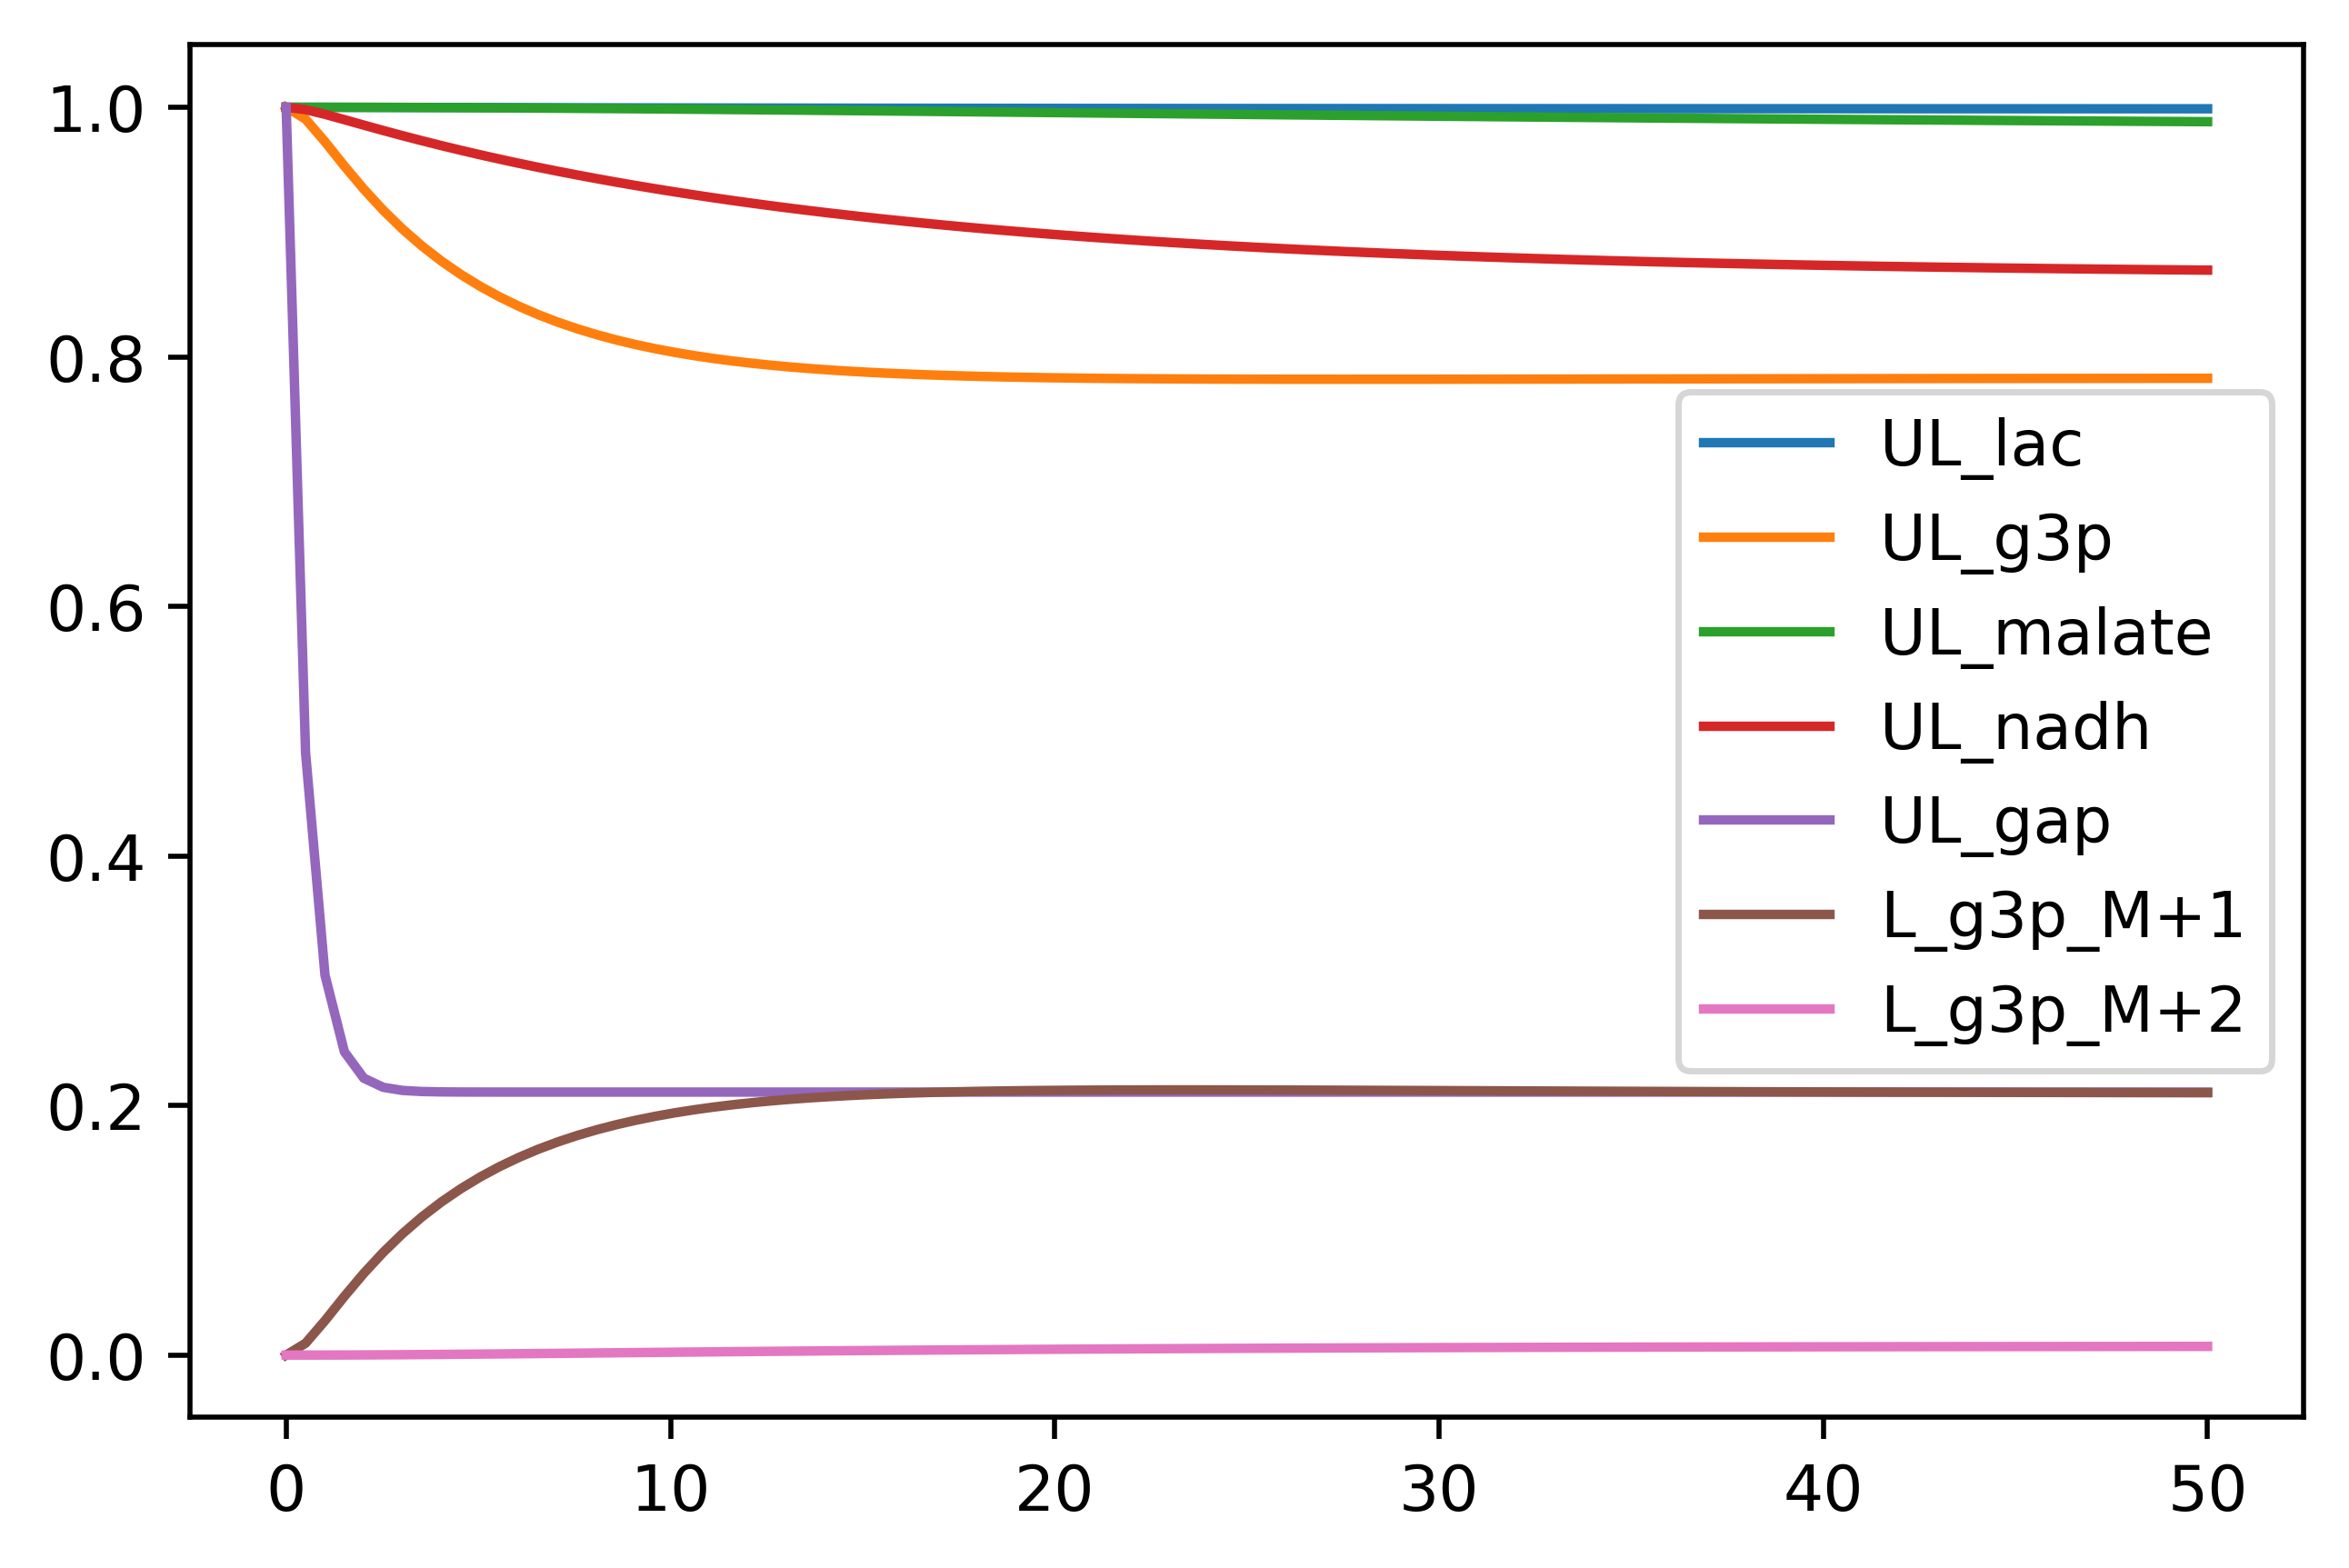

In [24]:
for col in ["UL_lac","UL_g3p","UL_malate","UL_nadh","UL_gap","L_g3p_M+1","L_g3p_M+2"]:
    plt.plot(ts,data[col],label=col)
plt.legend()
print(c0s)
print(lacE,glycolysis)
print(fluxes)
print(conc)

In [25]:
fluxes_inferred,C0s_inferred,df,conc,error = findFlux(data, ts, conc, lacE, glycolysis,vhvds, np.array([0,0,0,0]))
print(fluxes_inferred)
print(C0s_inferred)
print(conc)
print(error)
print(vhvds)
df

ISS NADH labeling:  0.12868092068959


../src\flux_finding_mp.py:258: RuntimeWarning: divide by zero encountered in double_scalars
  weights = [np.min([1,1/np.std(data["UL_gap"].values[tMapper[t[x]]])]) for x in range(len(t))]
../src\flux_finding_mp.py:200: RuntimeWarning: invalid value encountered in double_scalars
  nadh = lambda z:state[3]/concs["NADH"]
../src\flux_finding_mp.py:154: RuntimeWarning: invalid value encountered in double_scalars
  return unlabeled_flux + vh * gap(t) - (unlabeled_flux+ct * vh) * state / conc
../src\flux_finding_mp.py:213: RuntimeWarning: invalid value encountered in true_divide
  result[:,x] = sol[:,x]/concs[labels[x]]


[0.01038077 0.07524421 0.         0.05233989]
[0.72519094 0.91582819 1.28338696 0.6359412 ]
{'Lactate': 0.056293434838034506, 'G3P': 0.4790423739221892, 'Malate': 0.3805789998718001, 'NADH': 0.6181679073231613}
[1.28533119e-07 9.65199179e-07 4.56299123e-03 0.00000000e+00]
{'vhvd_nadh_ldh': 67.31971522049001, 'vhvd_nadh_mas': 5.117664721227551, 'vhvd_gap_gapdh': 6.311680729348055, 'vhvd_nadh_g3ps': 2.474350791499015, 'vhvd_dhap_g3ps': 2.4185629454084365, 'vhvd_nadh_dhap_g3ps': 10.398659201787034}


,UL_lac,UL_g3p,UL_malate,UL_nadh,UL_gap,L_lac,L_malate,L_nadh,L_gap,L_g3p_M+1,L_g3p_M+2,L_g3p
0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000e+00,0.0,0.000000,8.375015e-09,0.000000,0.000000,0.000000
1,0.999999,0.990493,1.0,0.997983,0.482771,9.701543e-07,0.0,0.002017,5.172286e-01,0.009491,0.000003,0.009507
2,0.999994,0.972346,1.0,0.993955,0.304507,5.940442e-06,0.0,0.006045,6.954926e-01,0.027592,0.000020,0.027654
3,0.999984,0.952834,1.0,0.989361,0.243068,1.578286e-05,0.0,0.010639,7.569316e-01,0.047040,0.000059,0.047166
4,0.999970,0.934302,1.0,0.984696,0.221893,3.012862e-05,0.0,0.015304,7.781067e-01,0.065496,0.000120,0.065698
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.998840,0.782562,1.0,0.873905,0.210757,1.160011e-03,0.0,0.126095,7.892429e-01,0.210340,0.006909,0.217438
96,0.998839,0.782571,1.0,0.873800,0.210757,1.161465e-03,0.0,0.126200,7.892429e-01,0.210315,0.006922,0.217429
97,0.998837,0.782580,1.0,0.873699,0.210757,1.162860e-03,0.0,0.126301,7.892429e-01,0.210291,0.006934,0.217420
98,0.998836,0.782589,1.0,0.873602,0.210757,1.164199e-03,0.0,0.126398,7.892429e-01,0.210267,0.006946,0.217411


In [26]:
dhap_params = fitSource(ts, data["UL_gap"])
dhap = lambda x: exponetialCurve(x,dhap_params)

    
firstT = np.min(ts)
firstT = [x for x in range(len(ts)) if abs(firstT-ts[x]) < 1e-5]
initialState = [np.mean(data.loc[firstT,label])*c for label,c in zip(["UL_lac","UL_g3p","UL_malate","UL_nadh"],[conc["Lactate"],conc["G3P"],conc["Malate"],conc["NADH"]])]


nadh = interp1d(ts,
                integrateModel(nadhEquation,ts,(fluxes_inferred[3],conc['NADH'],C0s_inferred[3] * fluxes_inferred[3],None,dhap,vhvds),initialState[3],conc["NADH"])[:,0],
                bounds_error=False,fill_value="extrapolate") 


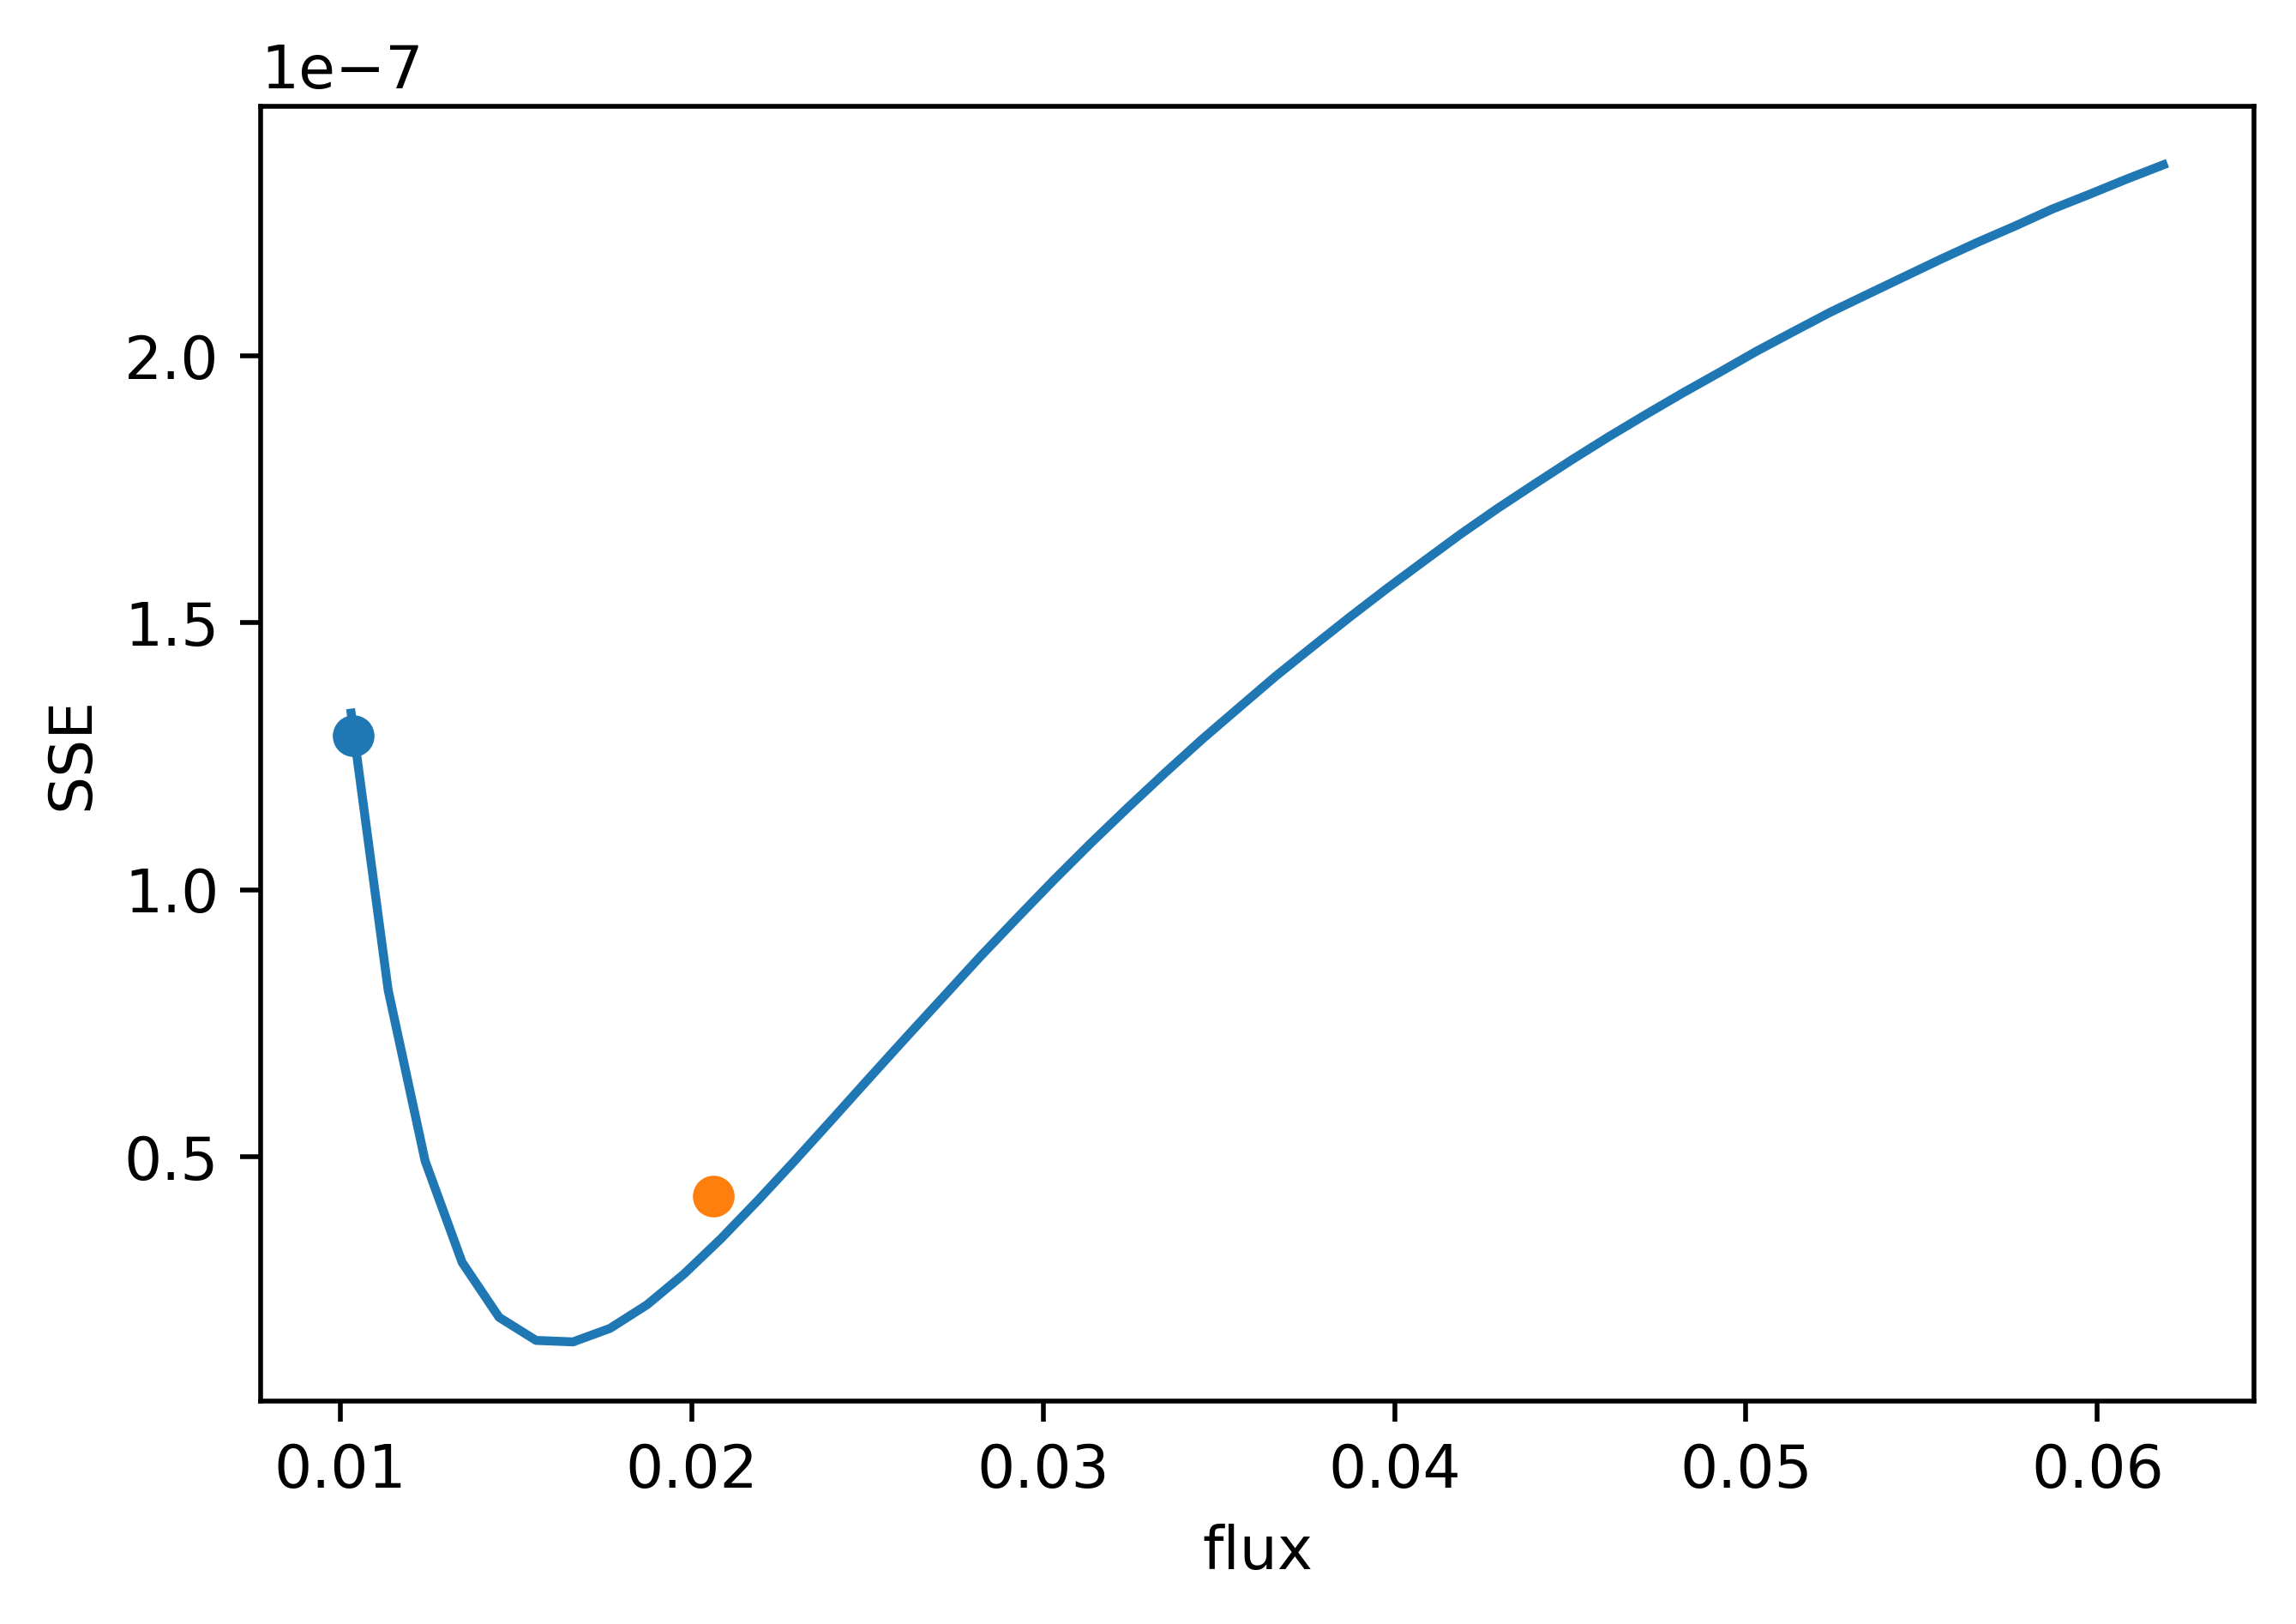

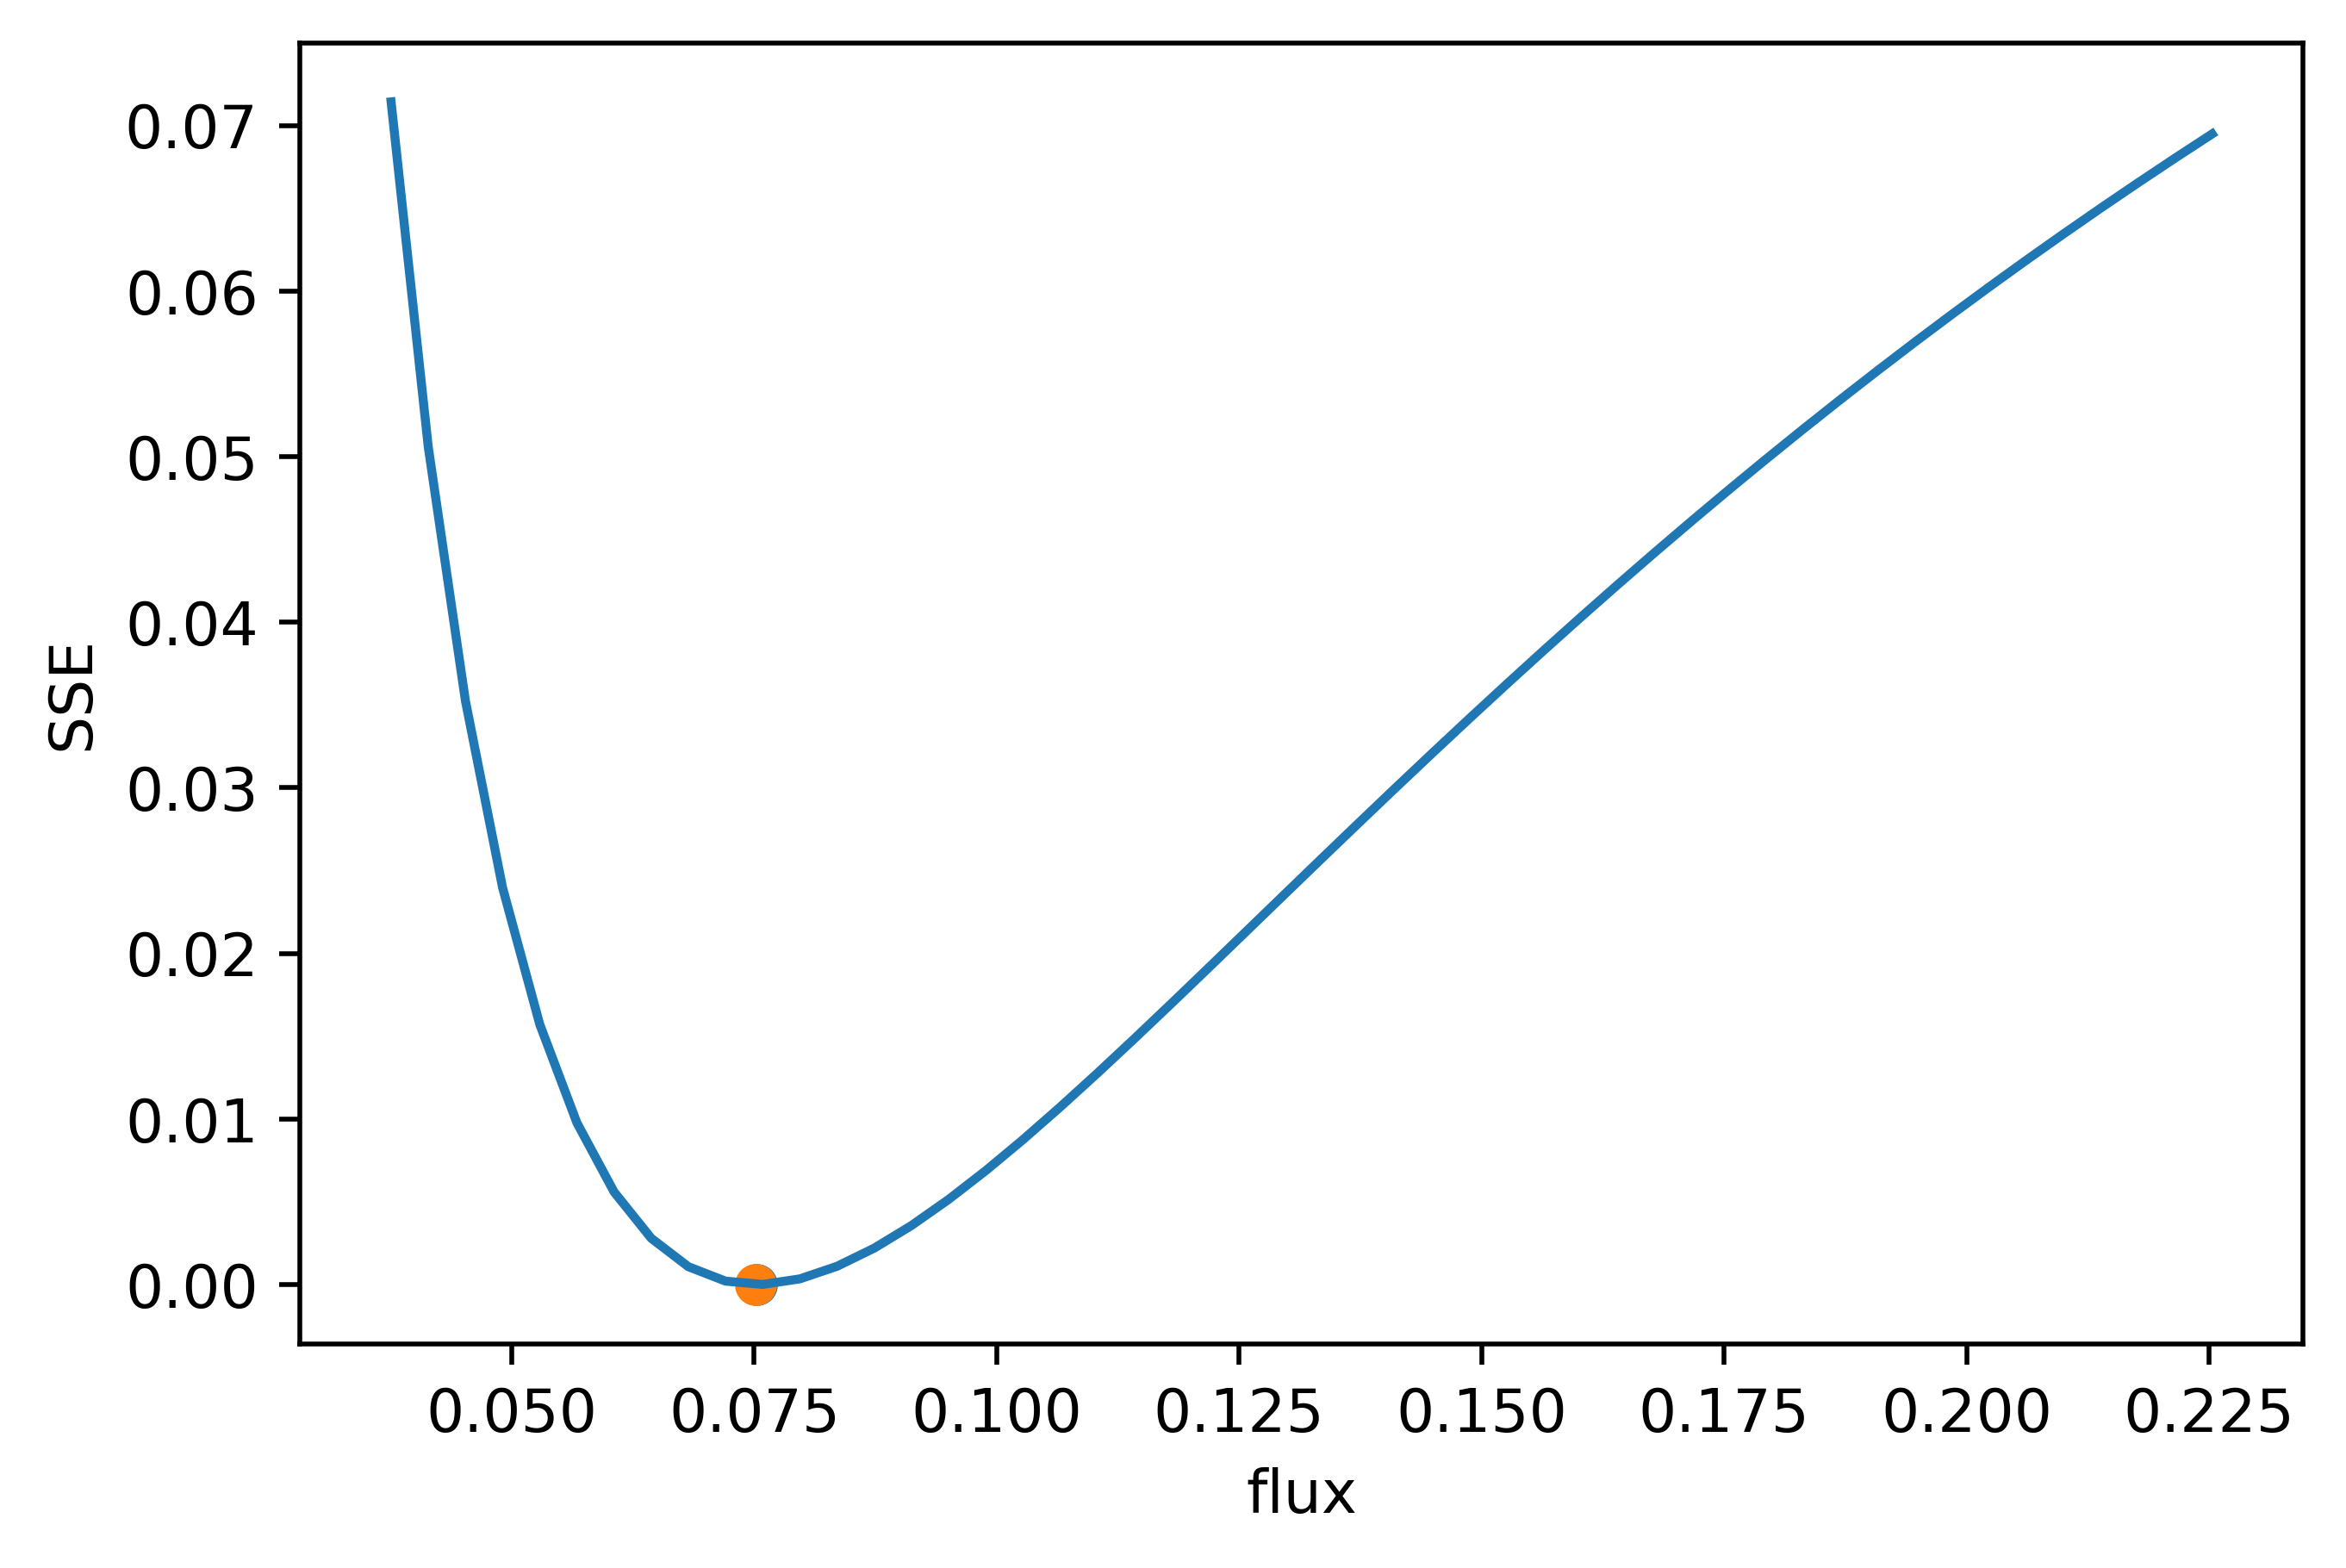

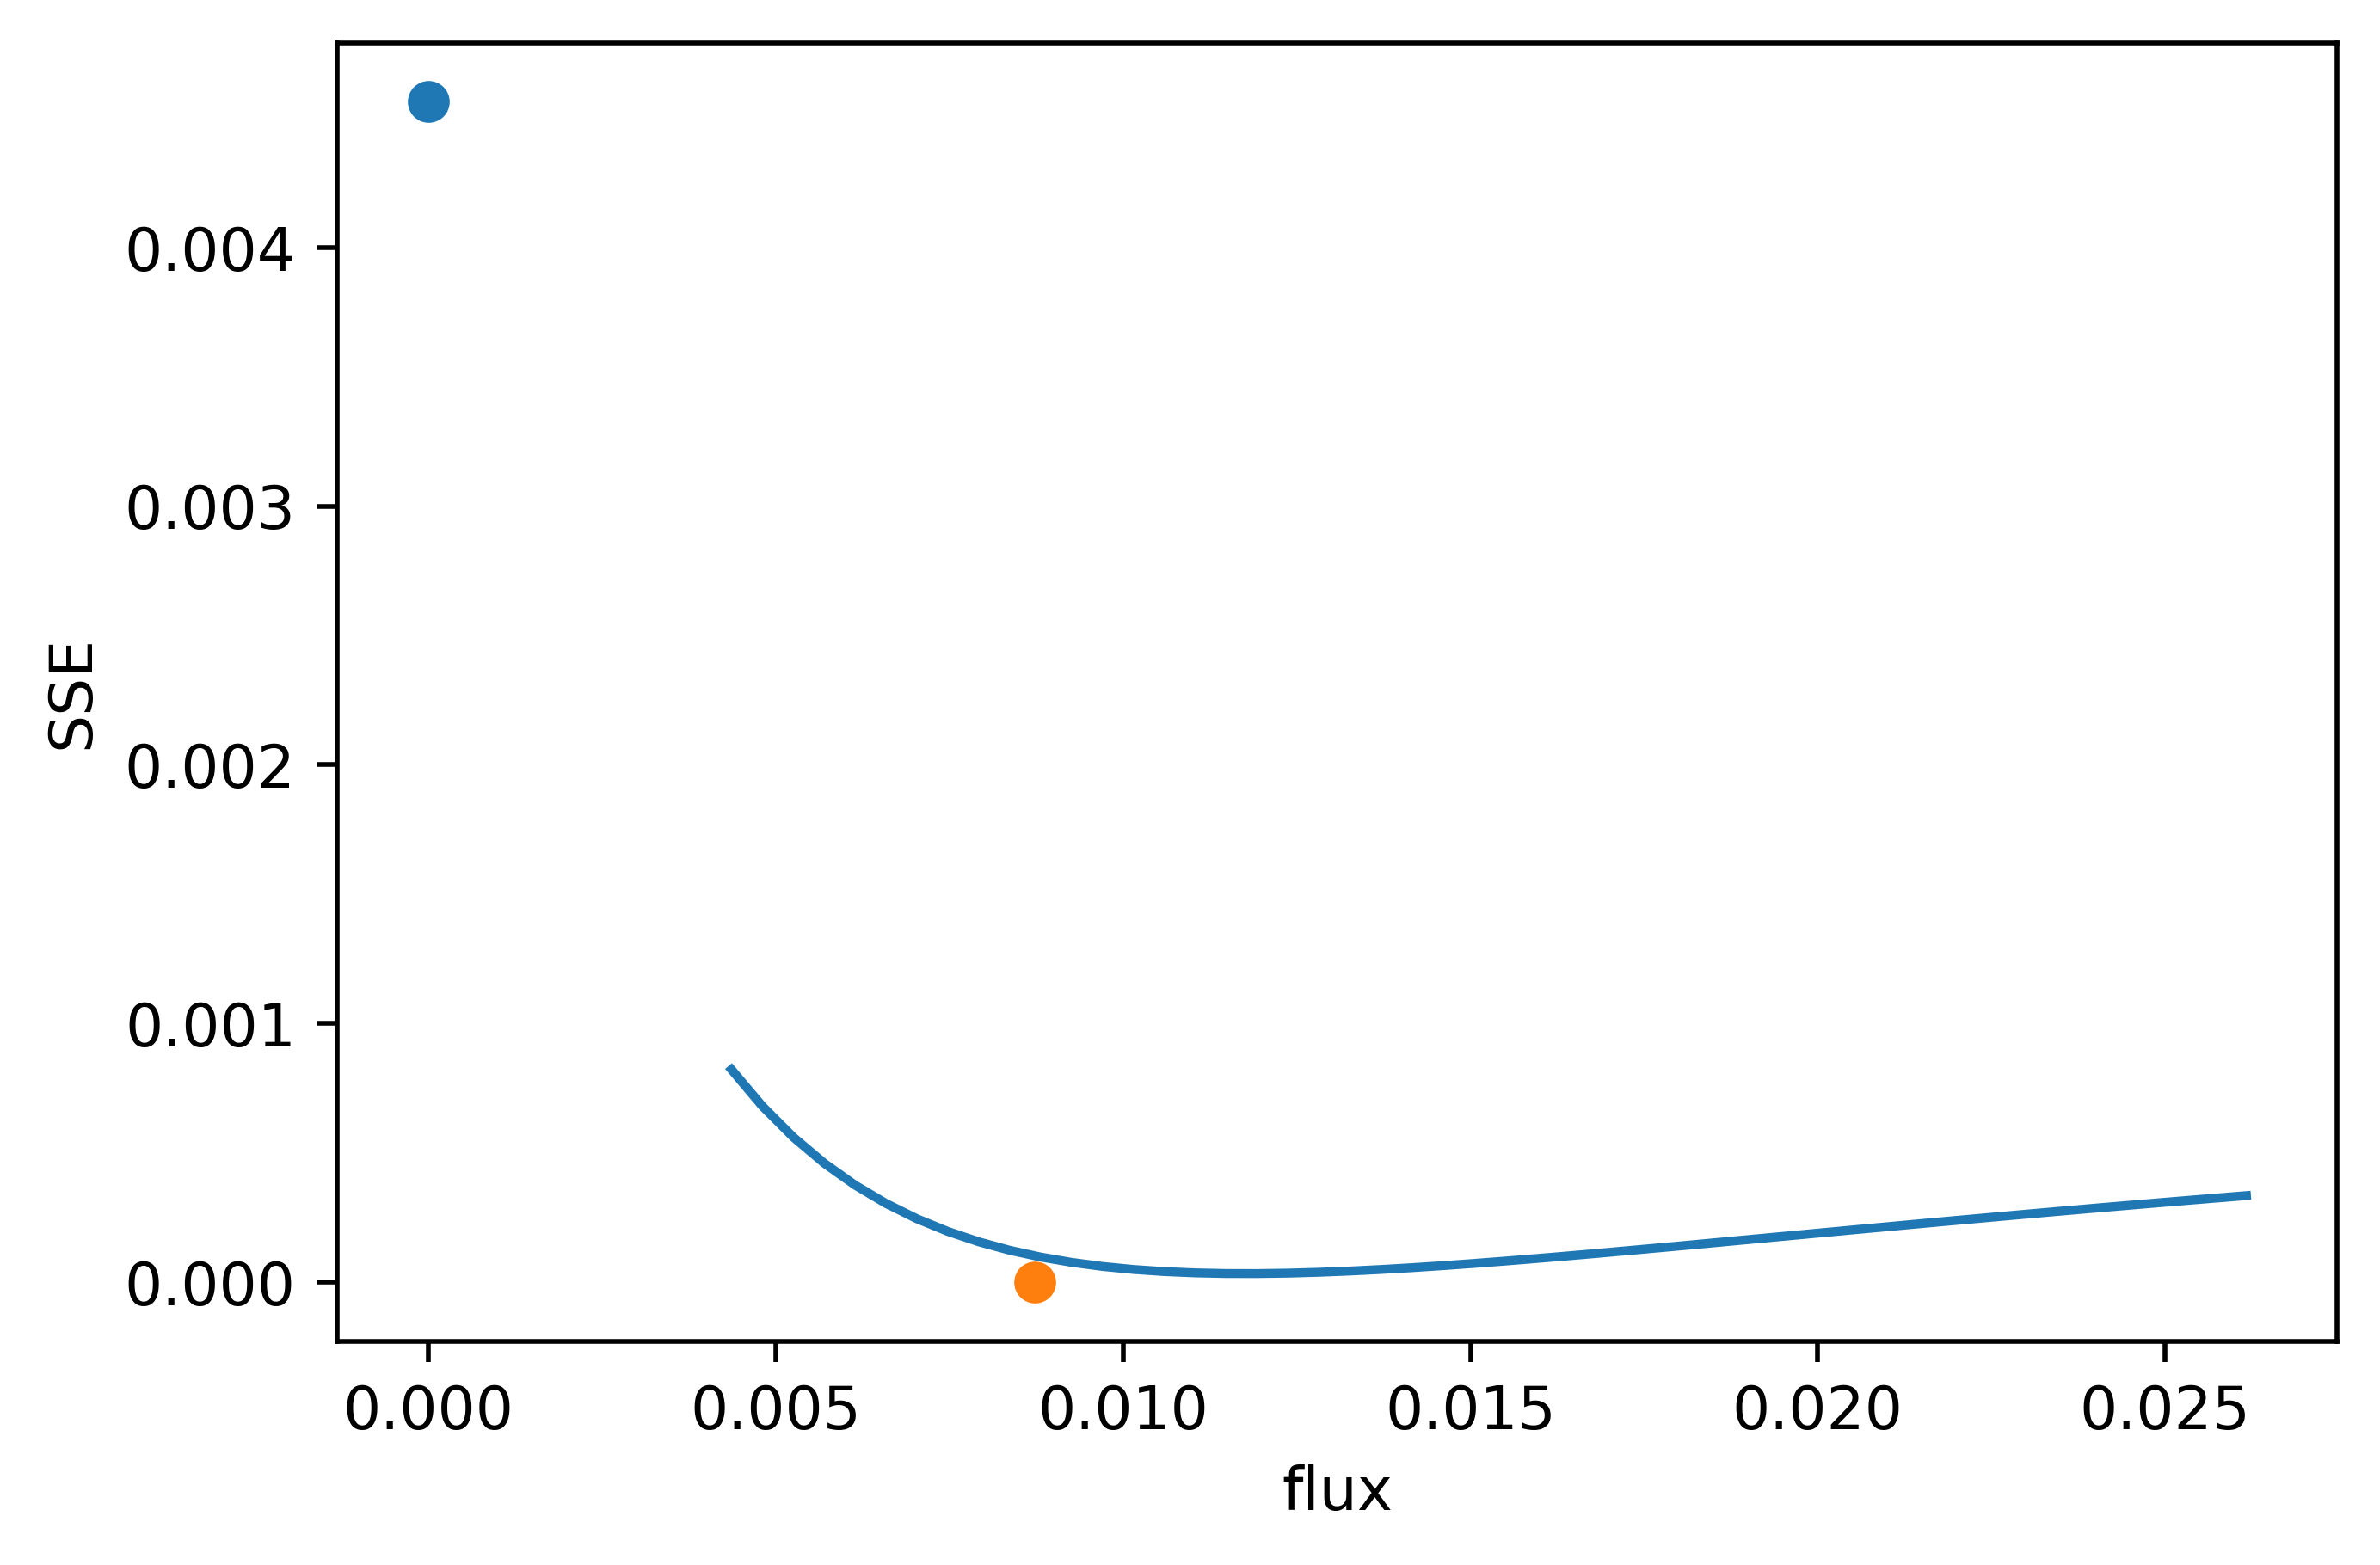

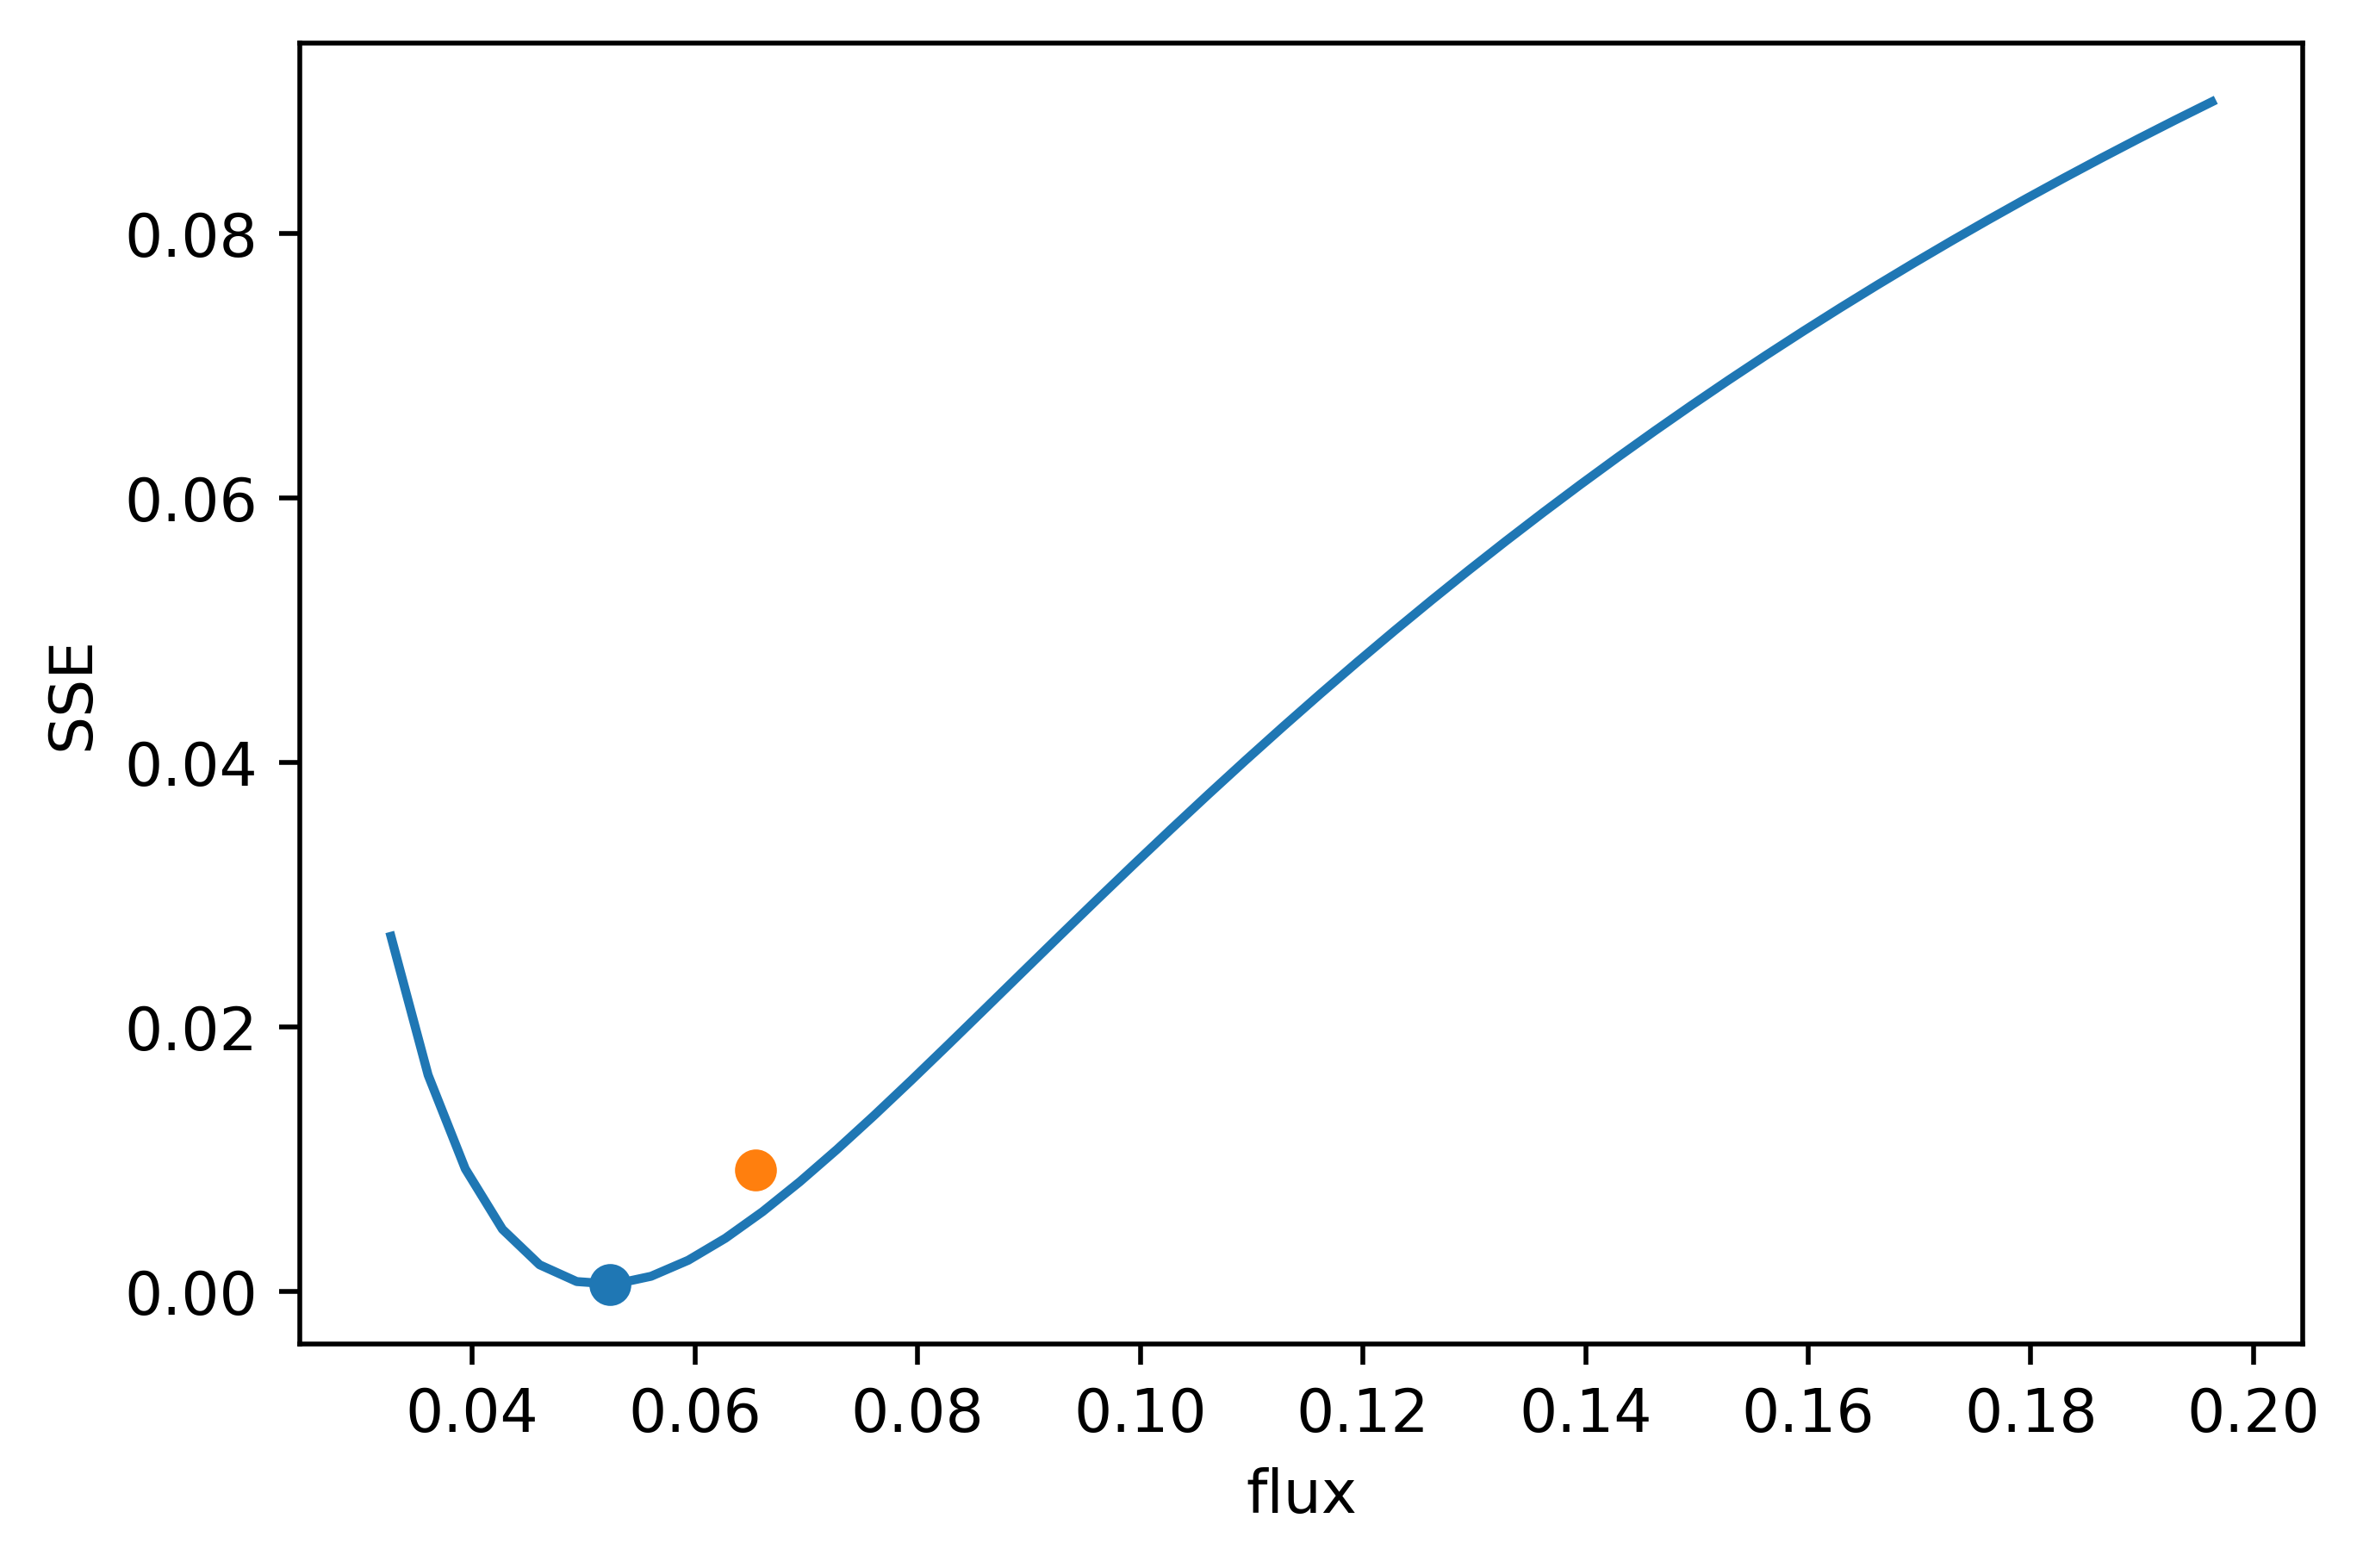

In [27]:
equations = [lactateEquation,g3pEquation,malateEquation,nadhEquation]
labels1 = ["UL_lac","UL_g3p","UL_malate","UL_nadh"]
labels2 = ["Lactate","G3P","Malate","NADH"]
for x in range(4):
    fluxes_to_try = np.linspace(fluxes[x]/2,3*fluxes[x])
    #fluxes_to_try = np.linspace(0.001,2*fluxes_inferred[x])
    errs = []
    for f in fluxes_to_try:
        val = integrateModel(equations[x],ts,(f,conc[labels2[x]],C0s_inferred[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
        err = sse(val,data[labels1[x]].values)#np.sum(np.abs(val-data["UL_nadh"].values))
        errs.append(err)
    f = fluxes_inferred[x]
    val = integrateModel(equations[x],ts,(f,conc[labels2[x]],C0s_inferred[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
    err = sse(val,data[labels1[x]].values)
    plt.figure()
    plt.plot(fluxes_to_try,errs)
    plt.ylabel("SSE")
    plt.xlabel("flux")
    plt.scatter([f],[err],label="inferred flux")
    
    f = fluxes[x]
    val = integrateModel(equations[x],ts,(f,conc[labels2[x]],c0s[x] * f,nadh,dhap,vhvds),initialState[x],conc[labels2[x]])[:,0]
    err = sse(val,data[labels1[x]].values)
    plt.scatter([f],[err],label="true flux")

#plt.xlim((0,20000))

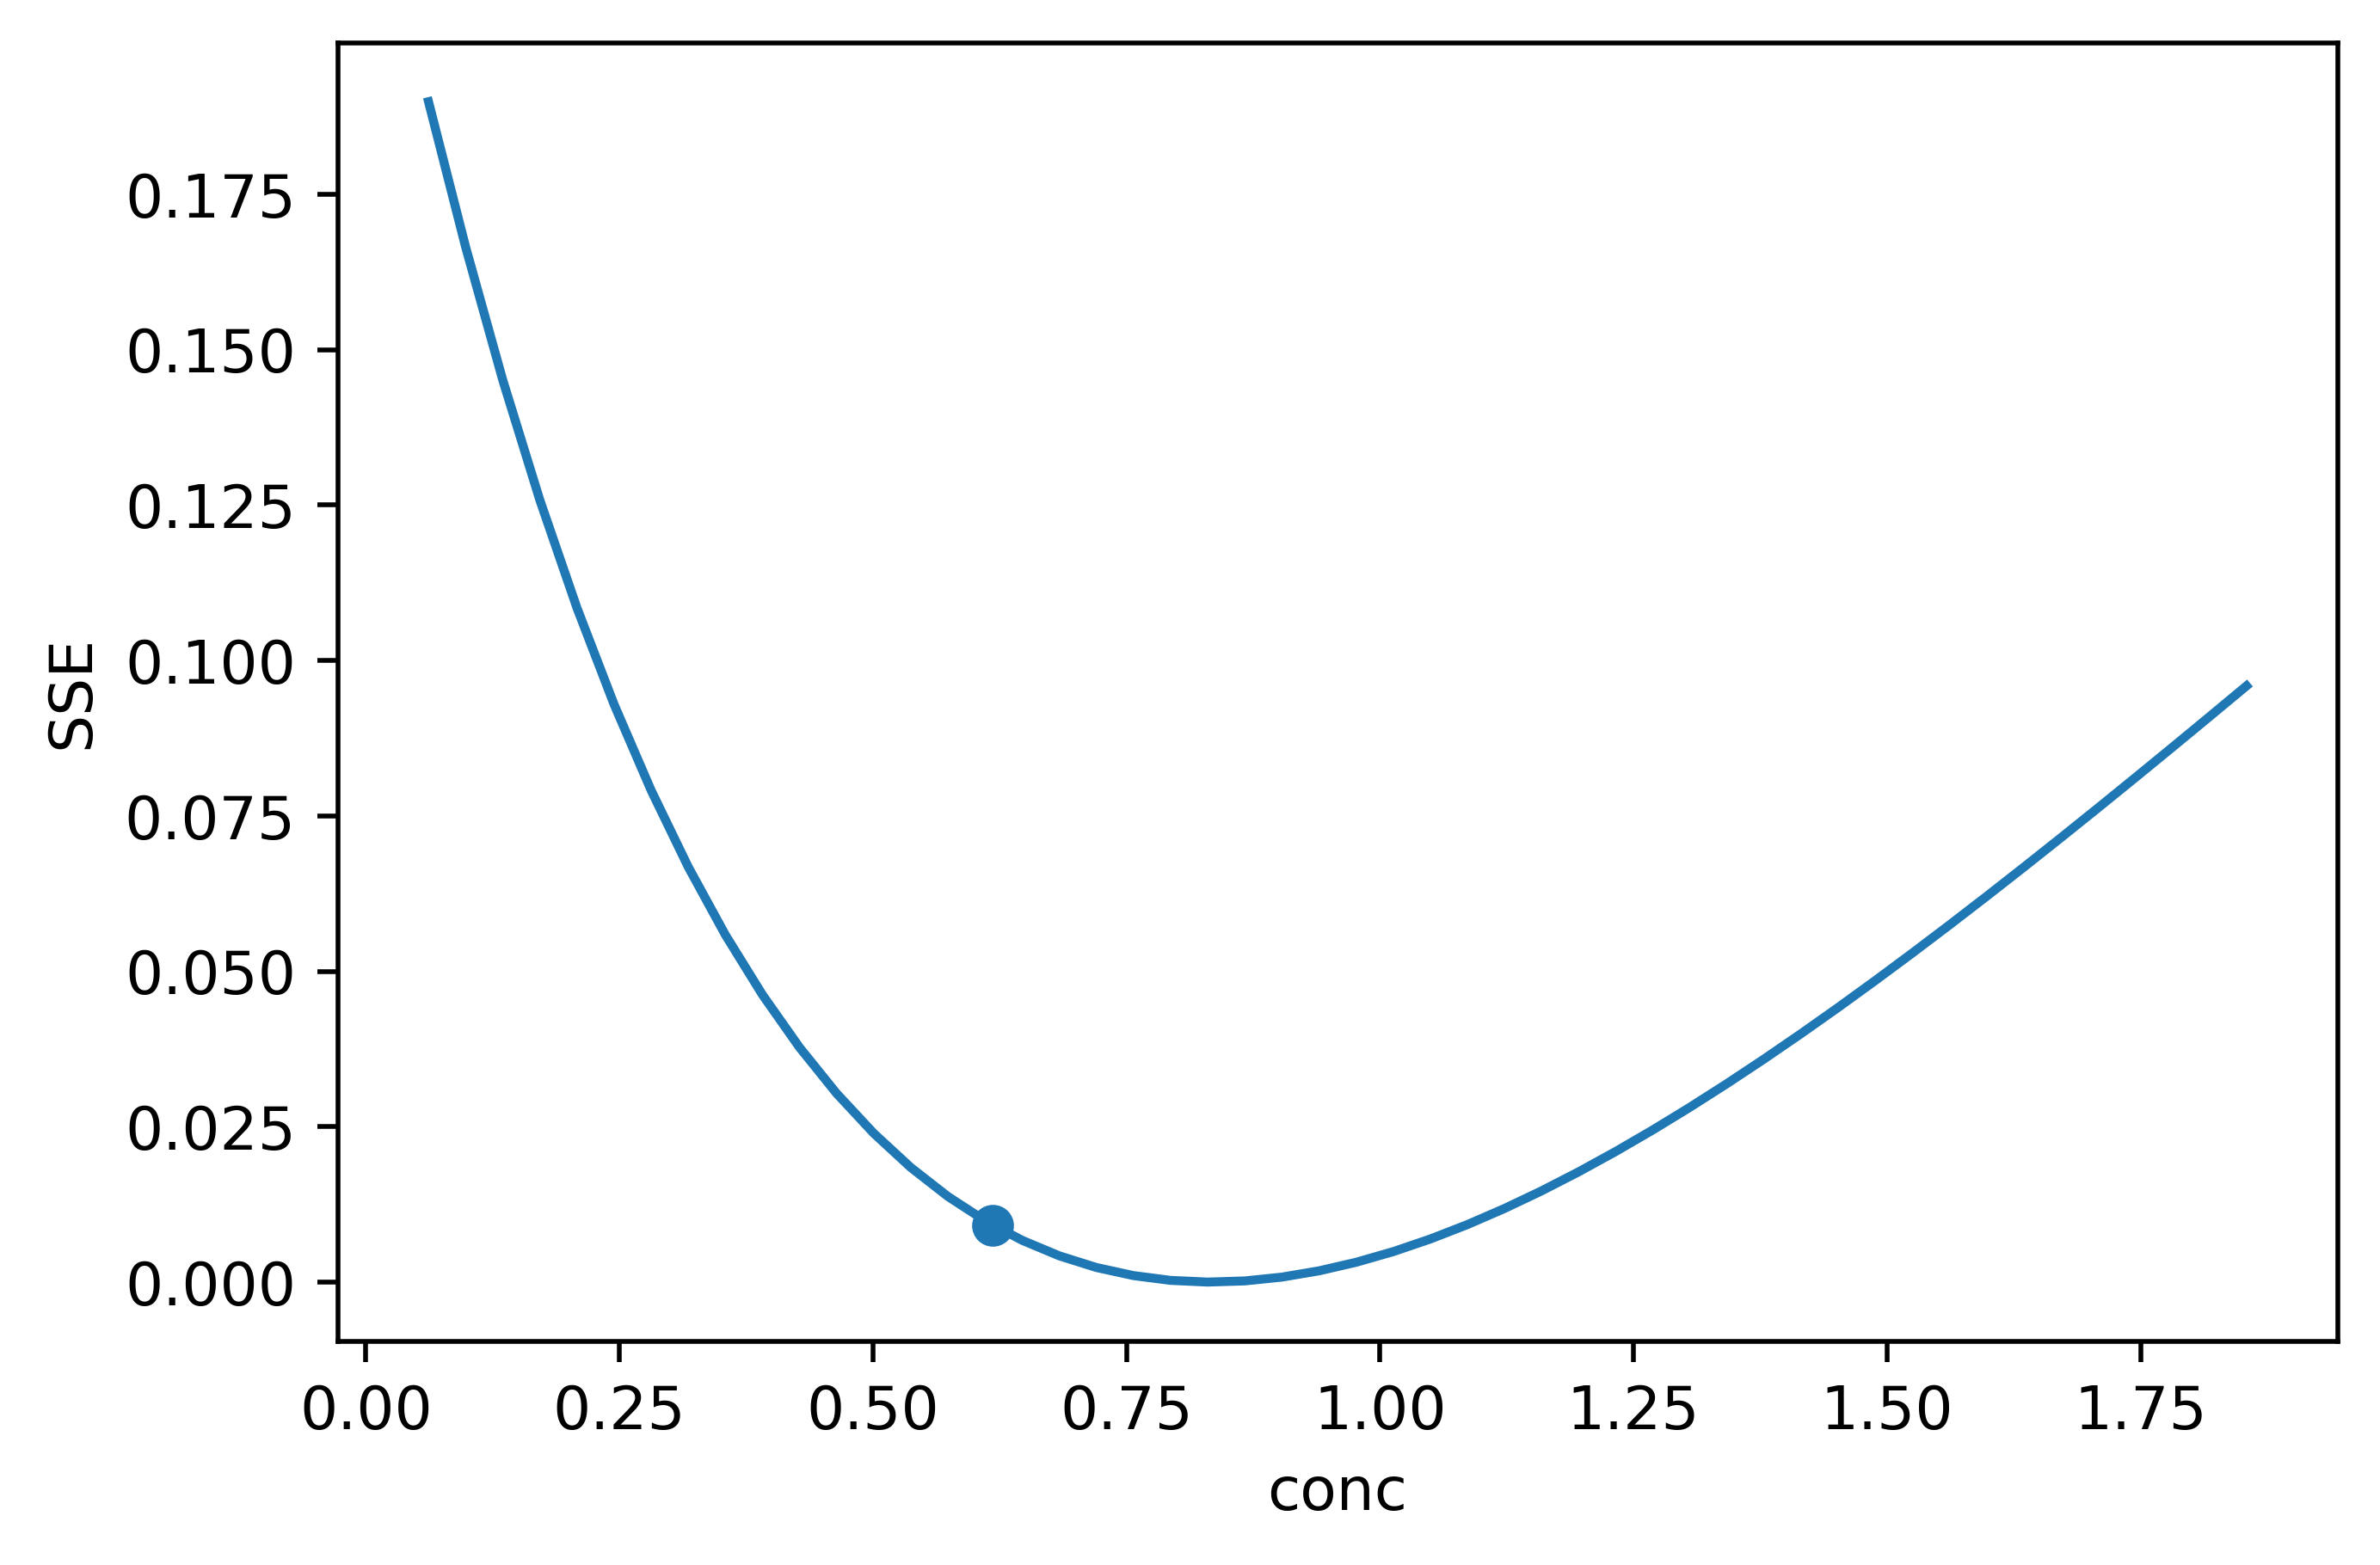

In [28]:
concs_to_try = np.linspace(conc["NADH"]/10,3*conc["NADH"])
errs = []
for c in concs_to_try:
    val = integrateModel(nadhEquation,ts,(fluxes[3],c,c0s[3] * fluxes[3],nadh,dhap,vhvds),c,c)[:,0]
    err = sse(val,data[labels1[x]].values)
    errs.append(err)
c = conc["NADH"]
val = integrateModel(nadhEquation,ts,(fluxes[3],c,c0s[3] * fluxes[3],nadh,dhap,vhvds),c,c)[:,0]
err = sse(val,data[labels1[x]].values)
plt.figure()
plt.plot(concs_to_try,errs)
plt.ylabel("SSE")
plt.xlabel("conc")
plt.scatter([c],[err],label="inferred conc")



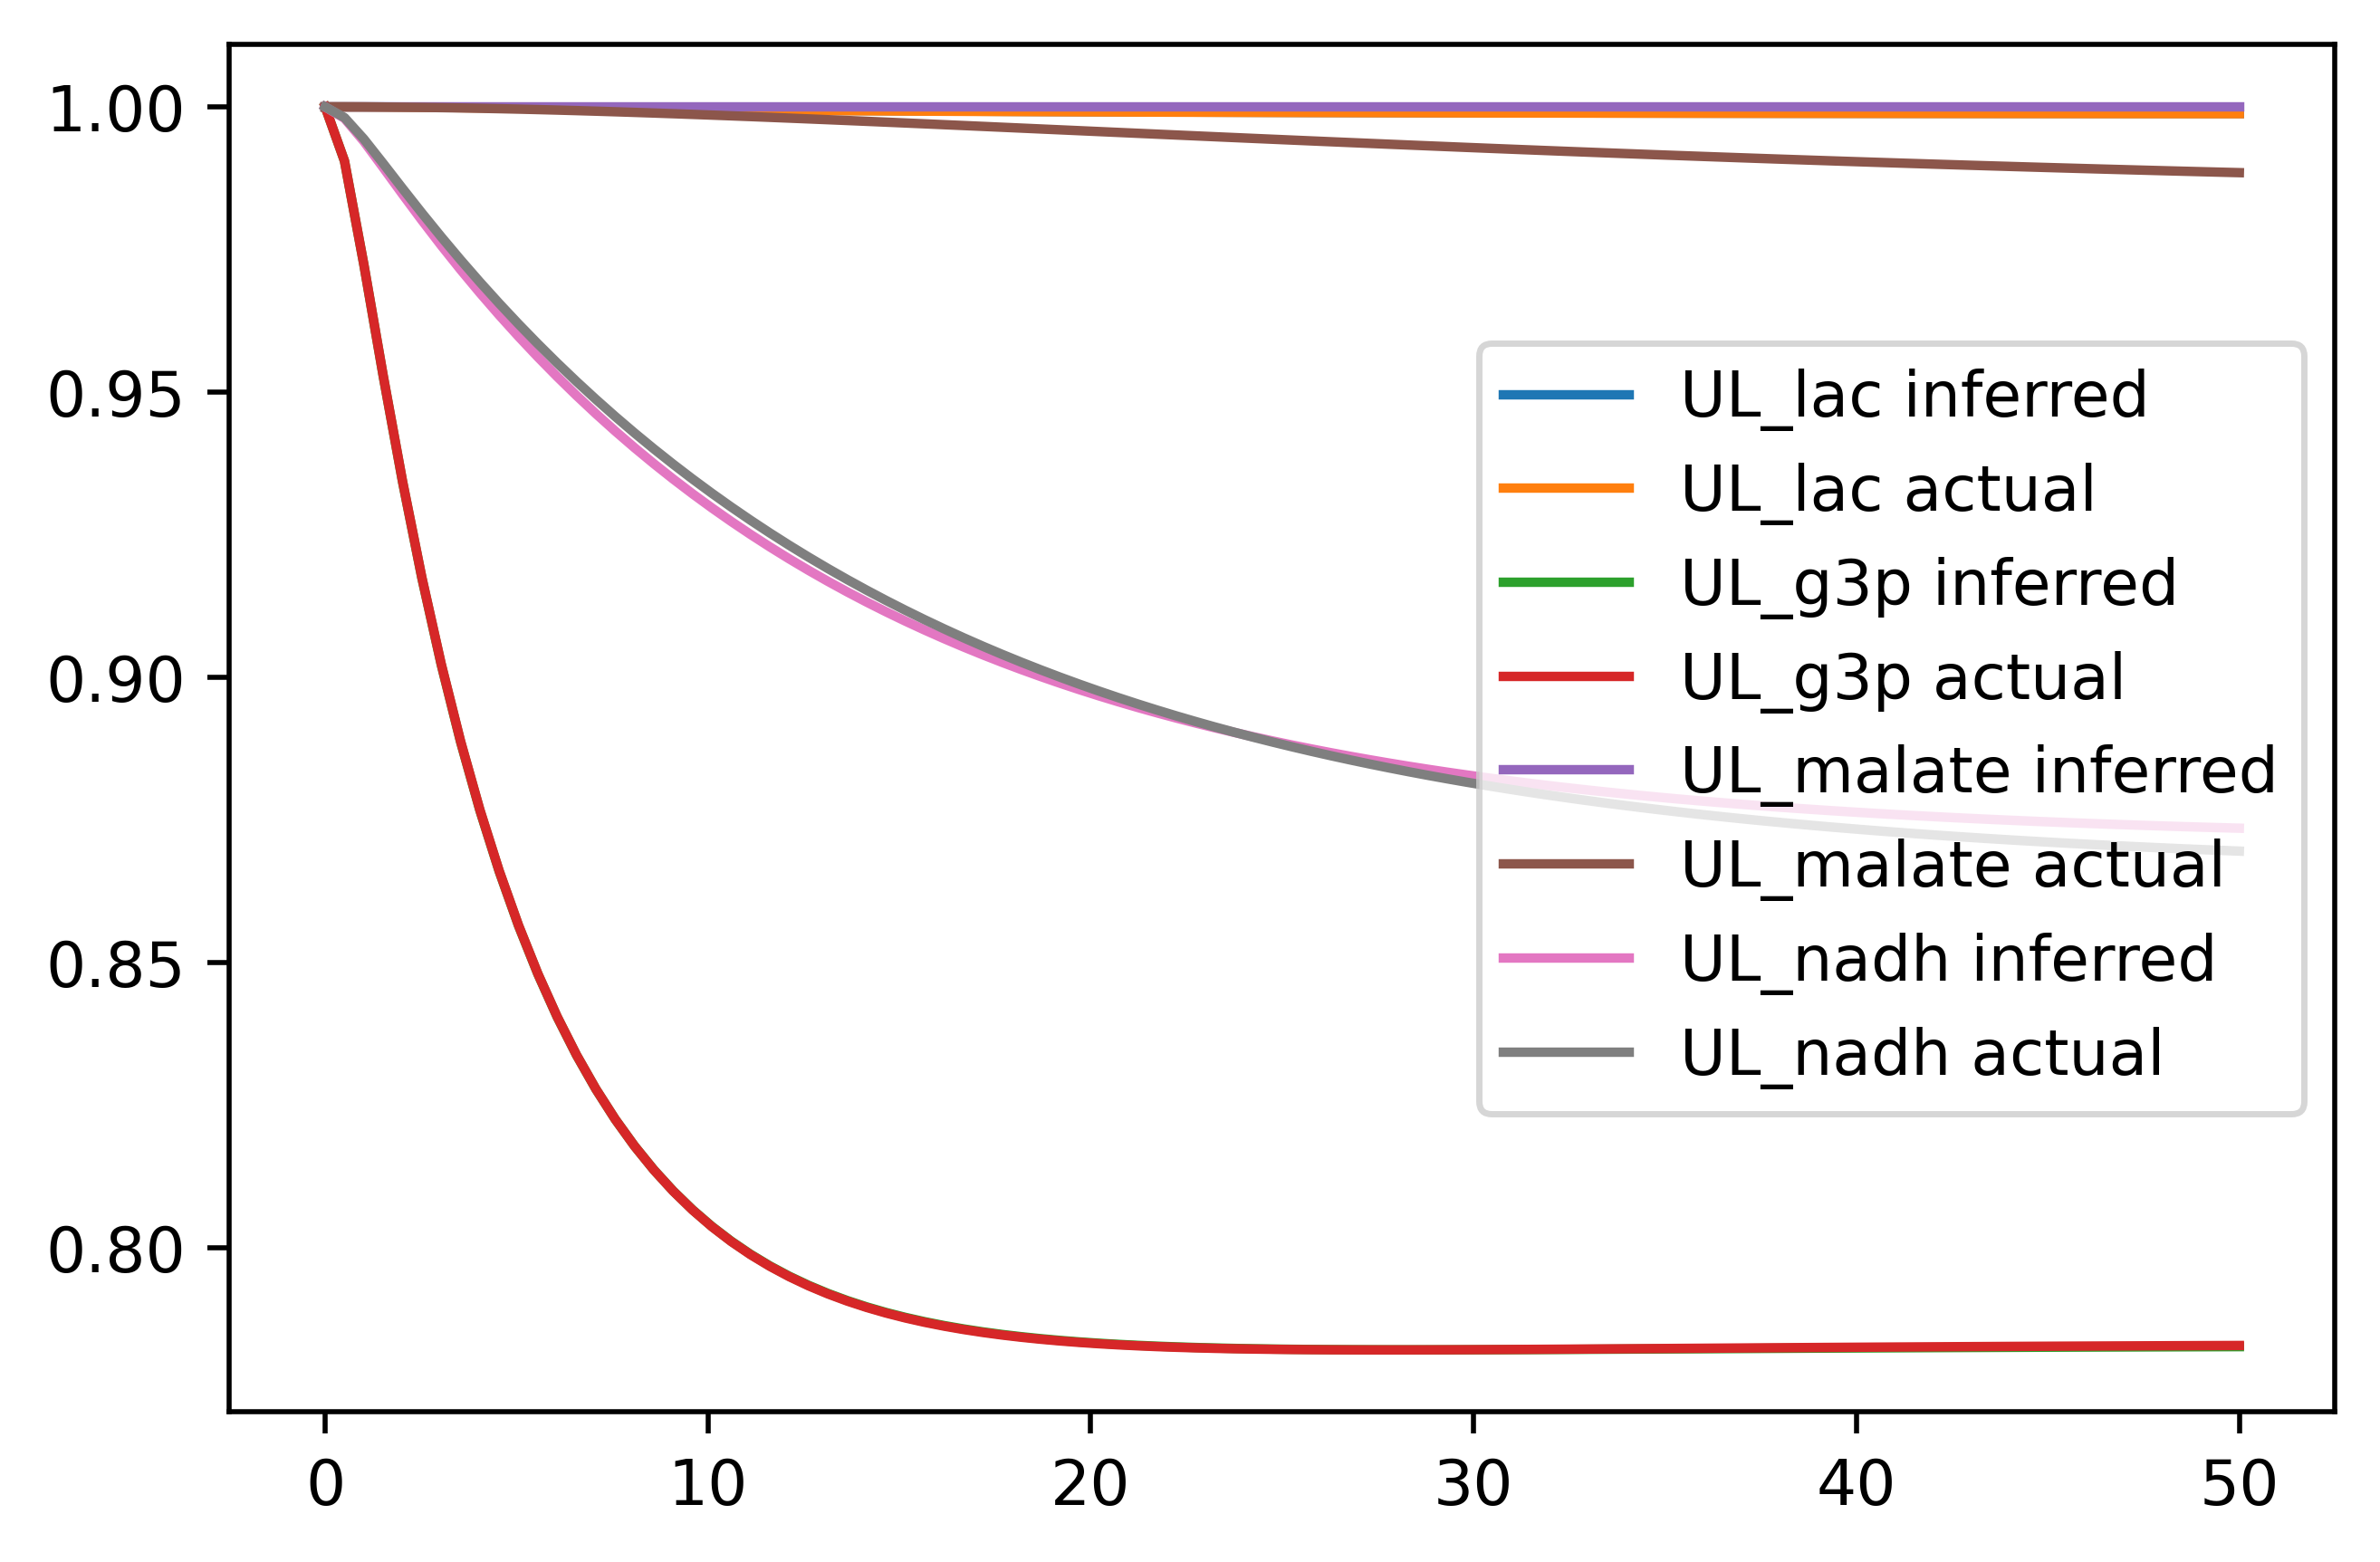

In [29]:
values = integrateLabelingModel(ts, fluxes_inferred,conc,dhap_params,C0s_inferred,vhvds,initialState)
inferred = pd.DataFrame(data=values,columns=["UL_lac","UL_g3p","UL_malate","UL_nadh"])
for col in ["UL_lac","UL_g3p","UL_malate","UL_nadh"]:
    plt.plot(ts,inferred[col],label=col + " inferred")
    plt.plot(ts,data[col],label=col+" actual")
plt.legend()


In [20]:
if __name__ == '__main__':
    true = []
    pred = []
    err = []
    args = [[ts,numBestFitIters] for _ in range(numSims)]
    result = startConcurrentTask(simulateDataAndInferFlux,args,numCores,"running simulations",len(args))
    for fluxes,(inferred_fluxes,_,_,conc,errs) in result:
        true.append(fluxes)
        pred.append(inferred_fluxes)
        err.append(errs)
true = np.array(true)
pred = np.array(pred)
err = np.array(err)

running simulations |██████████████████████████████████████████████████| 100.0% 


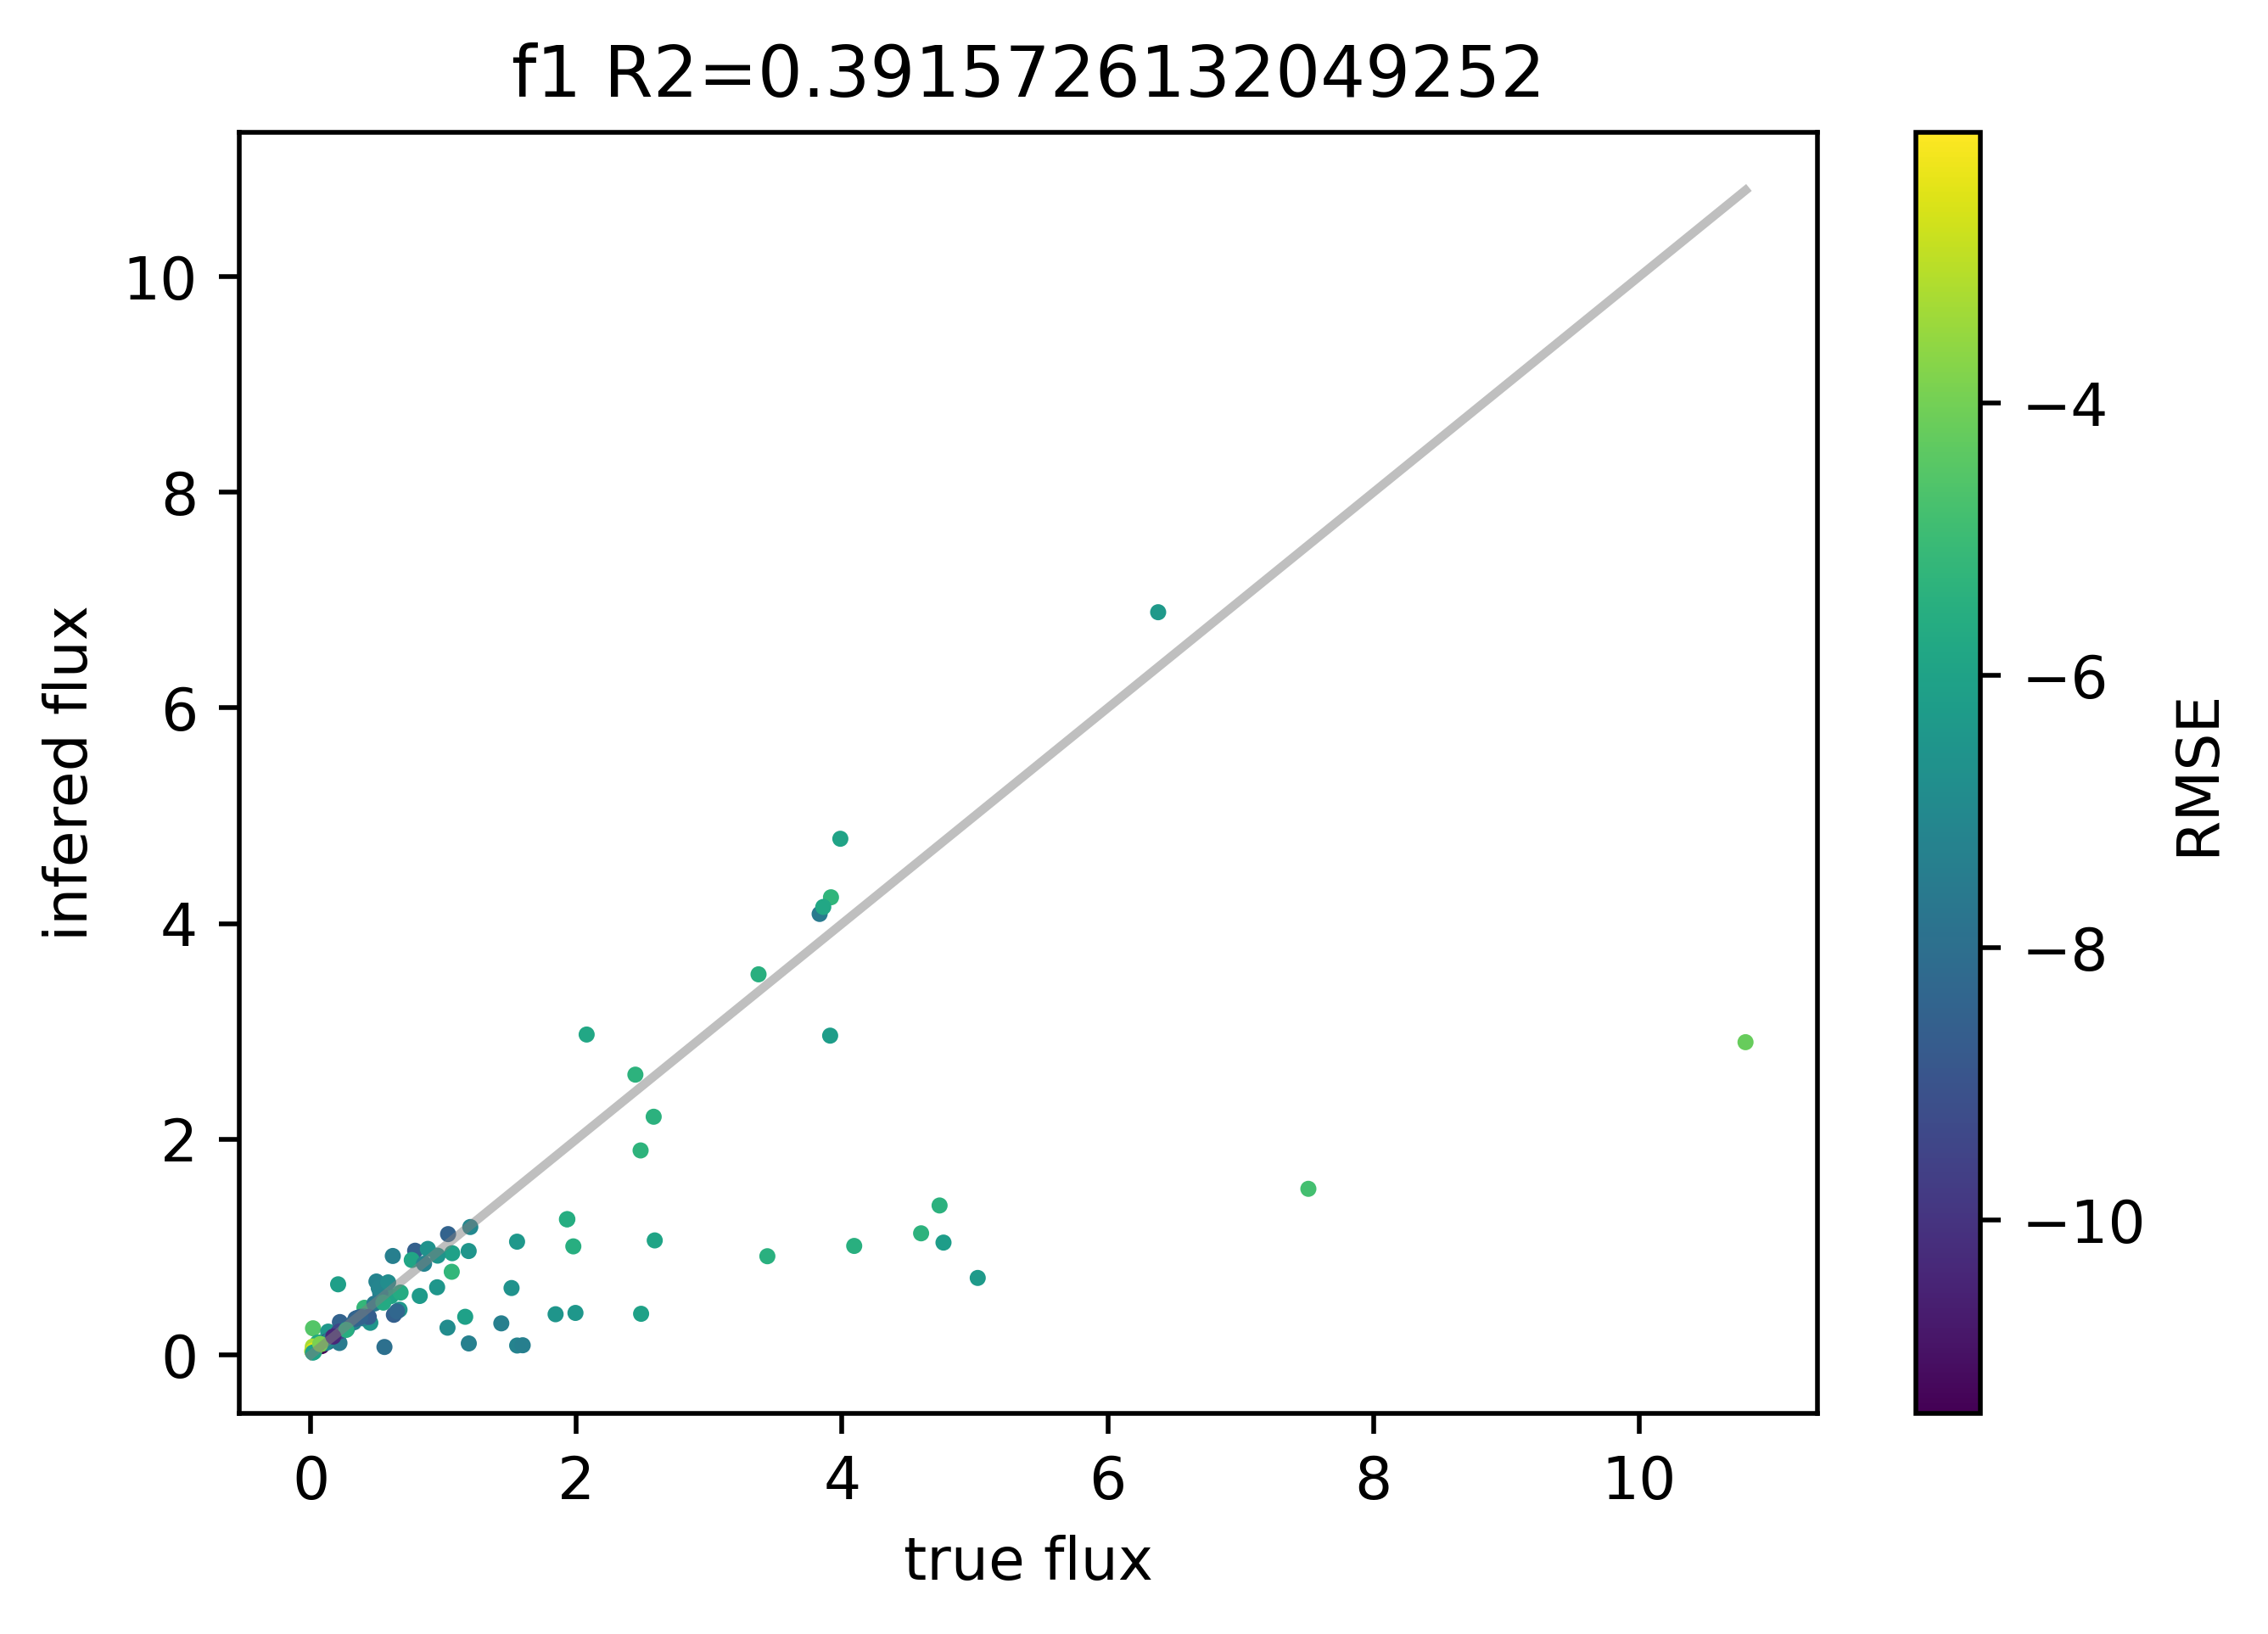

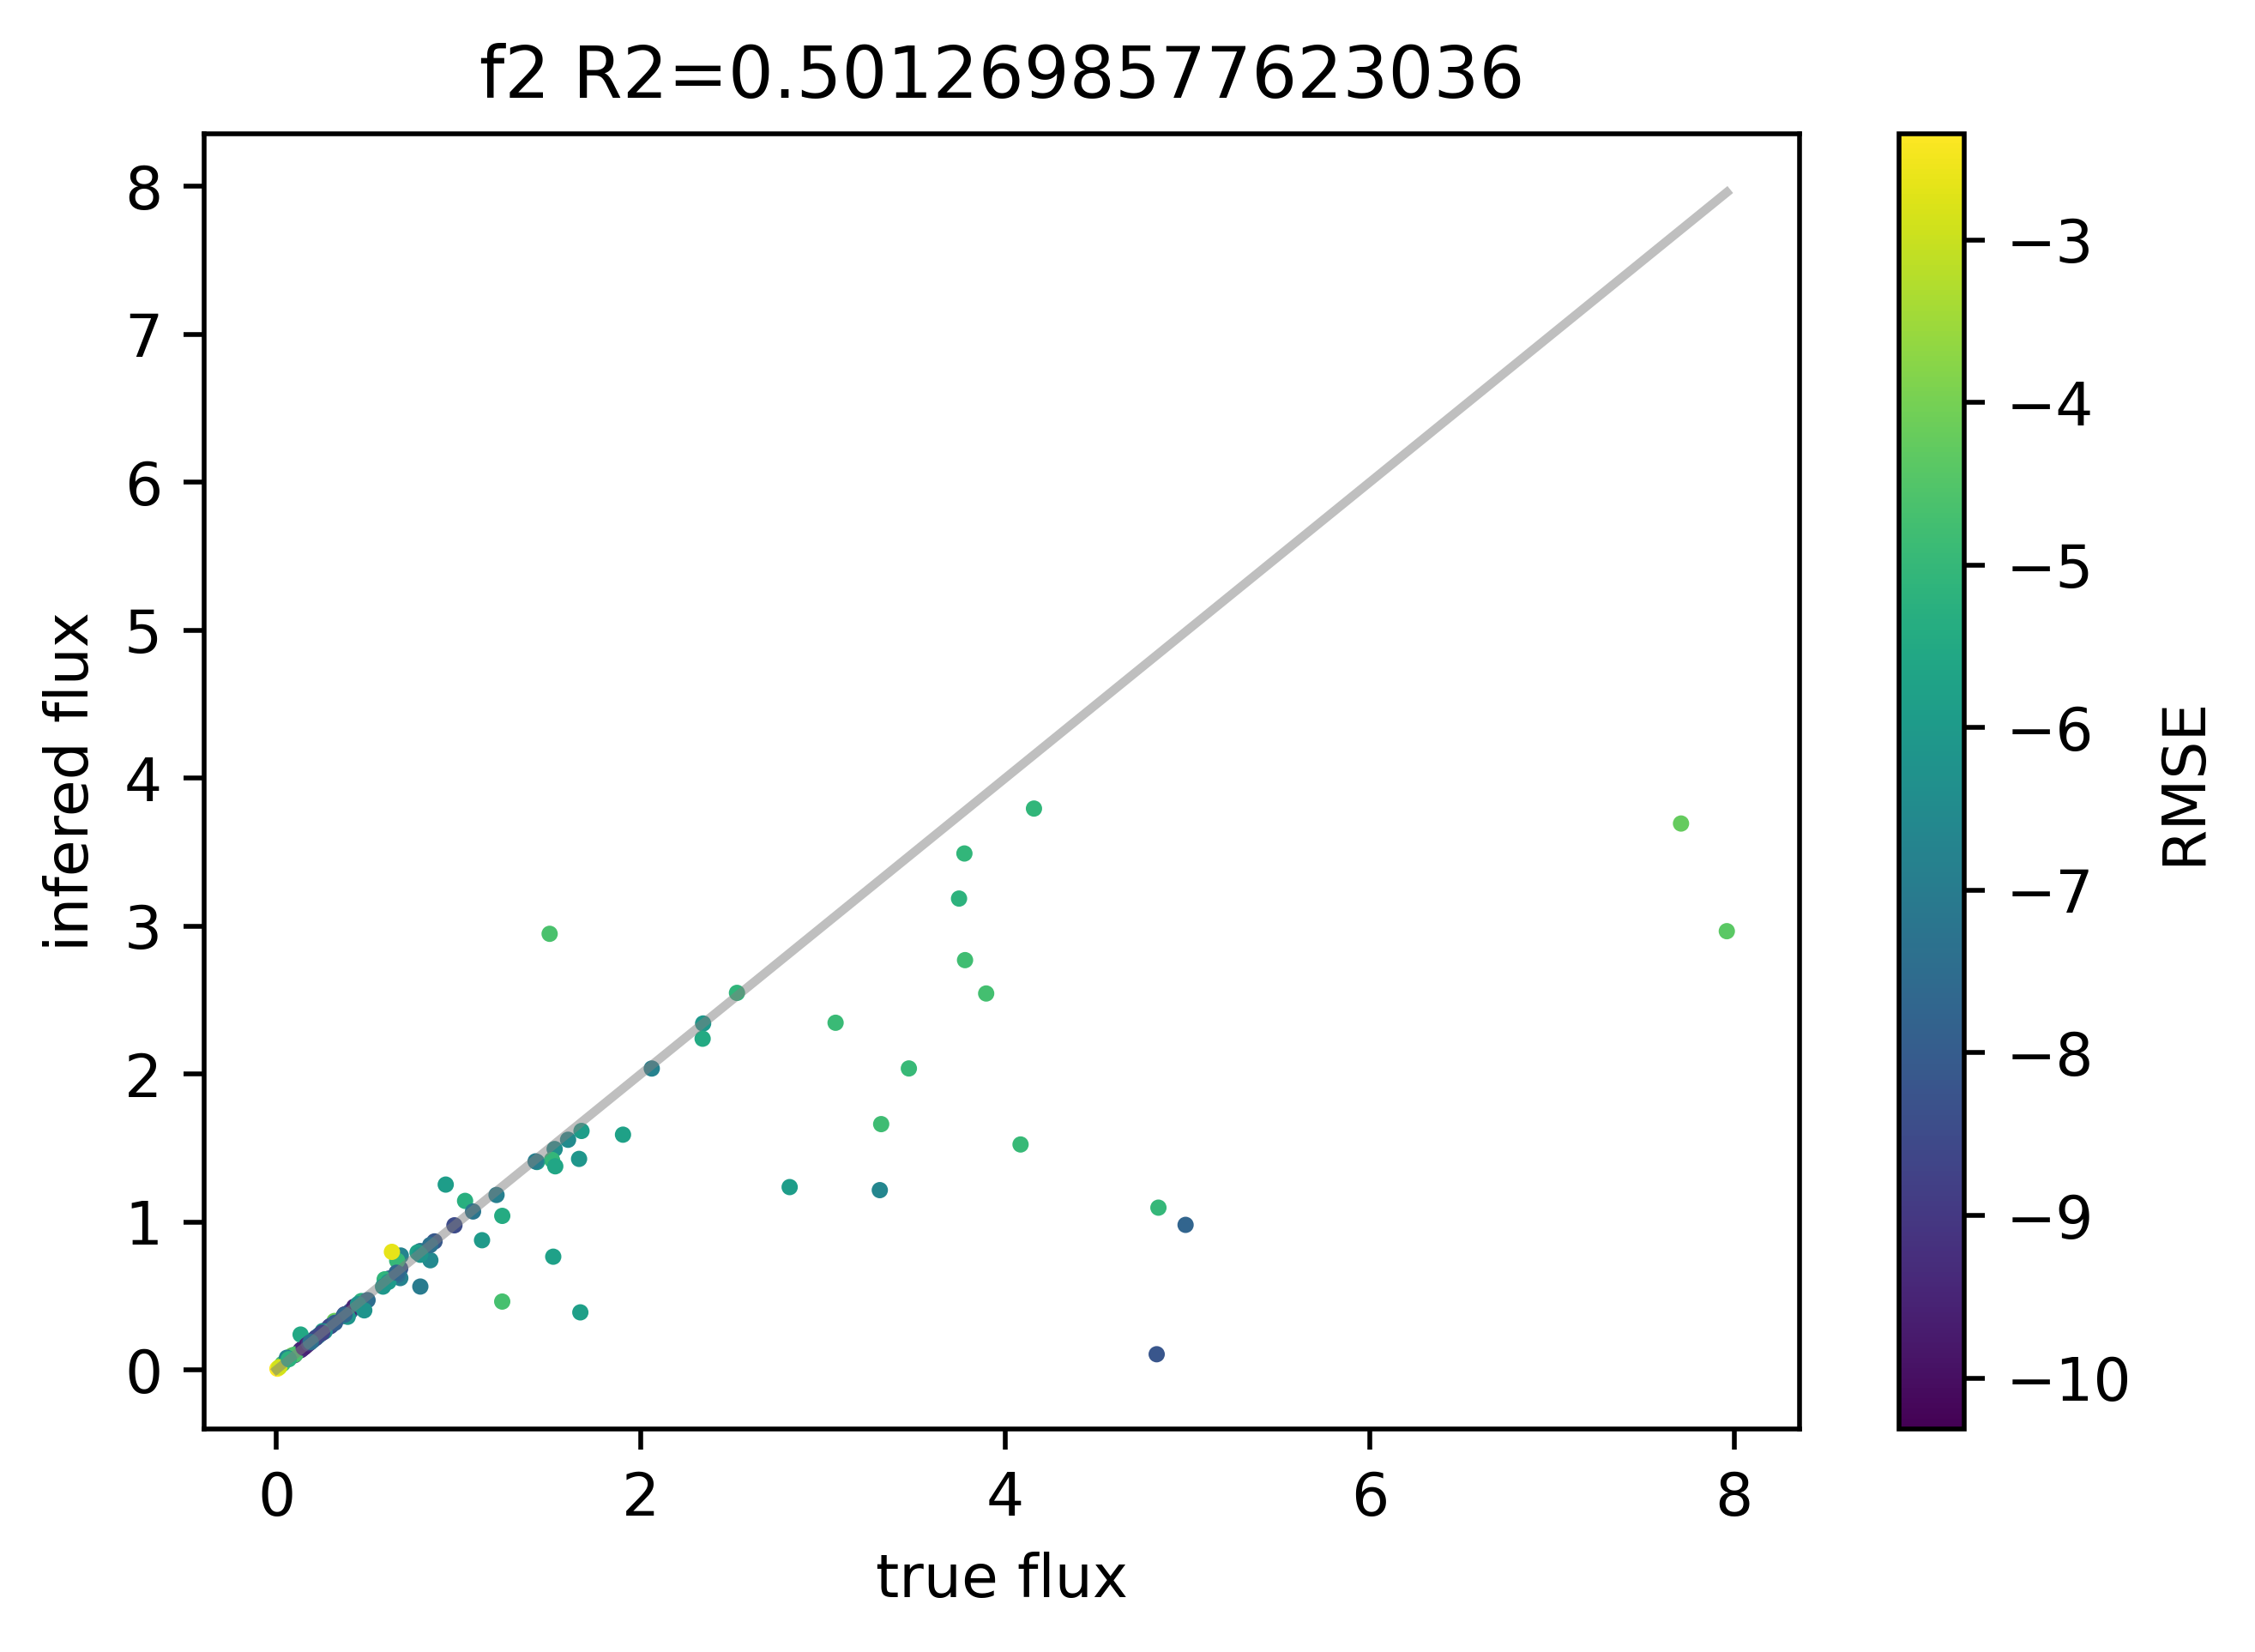

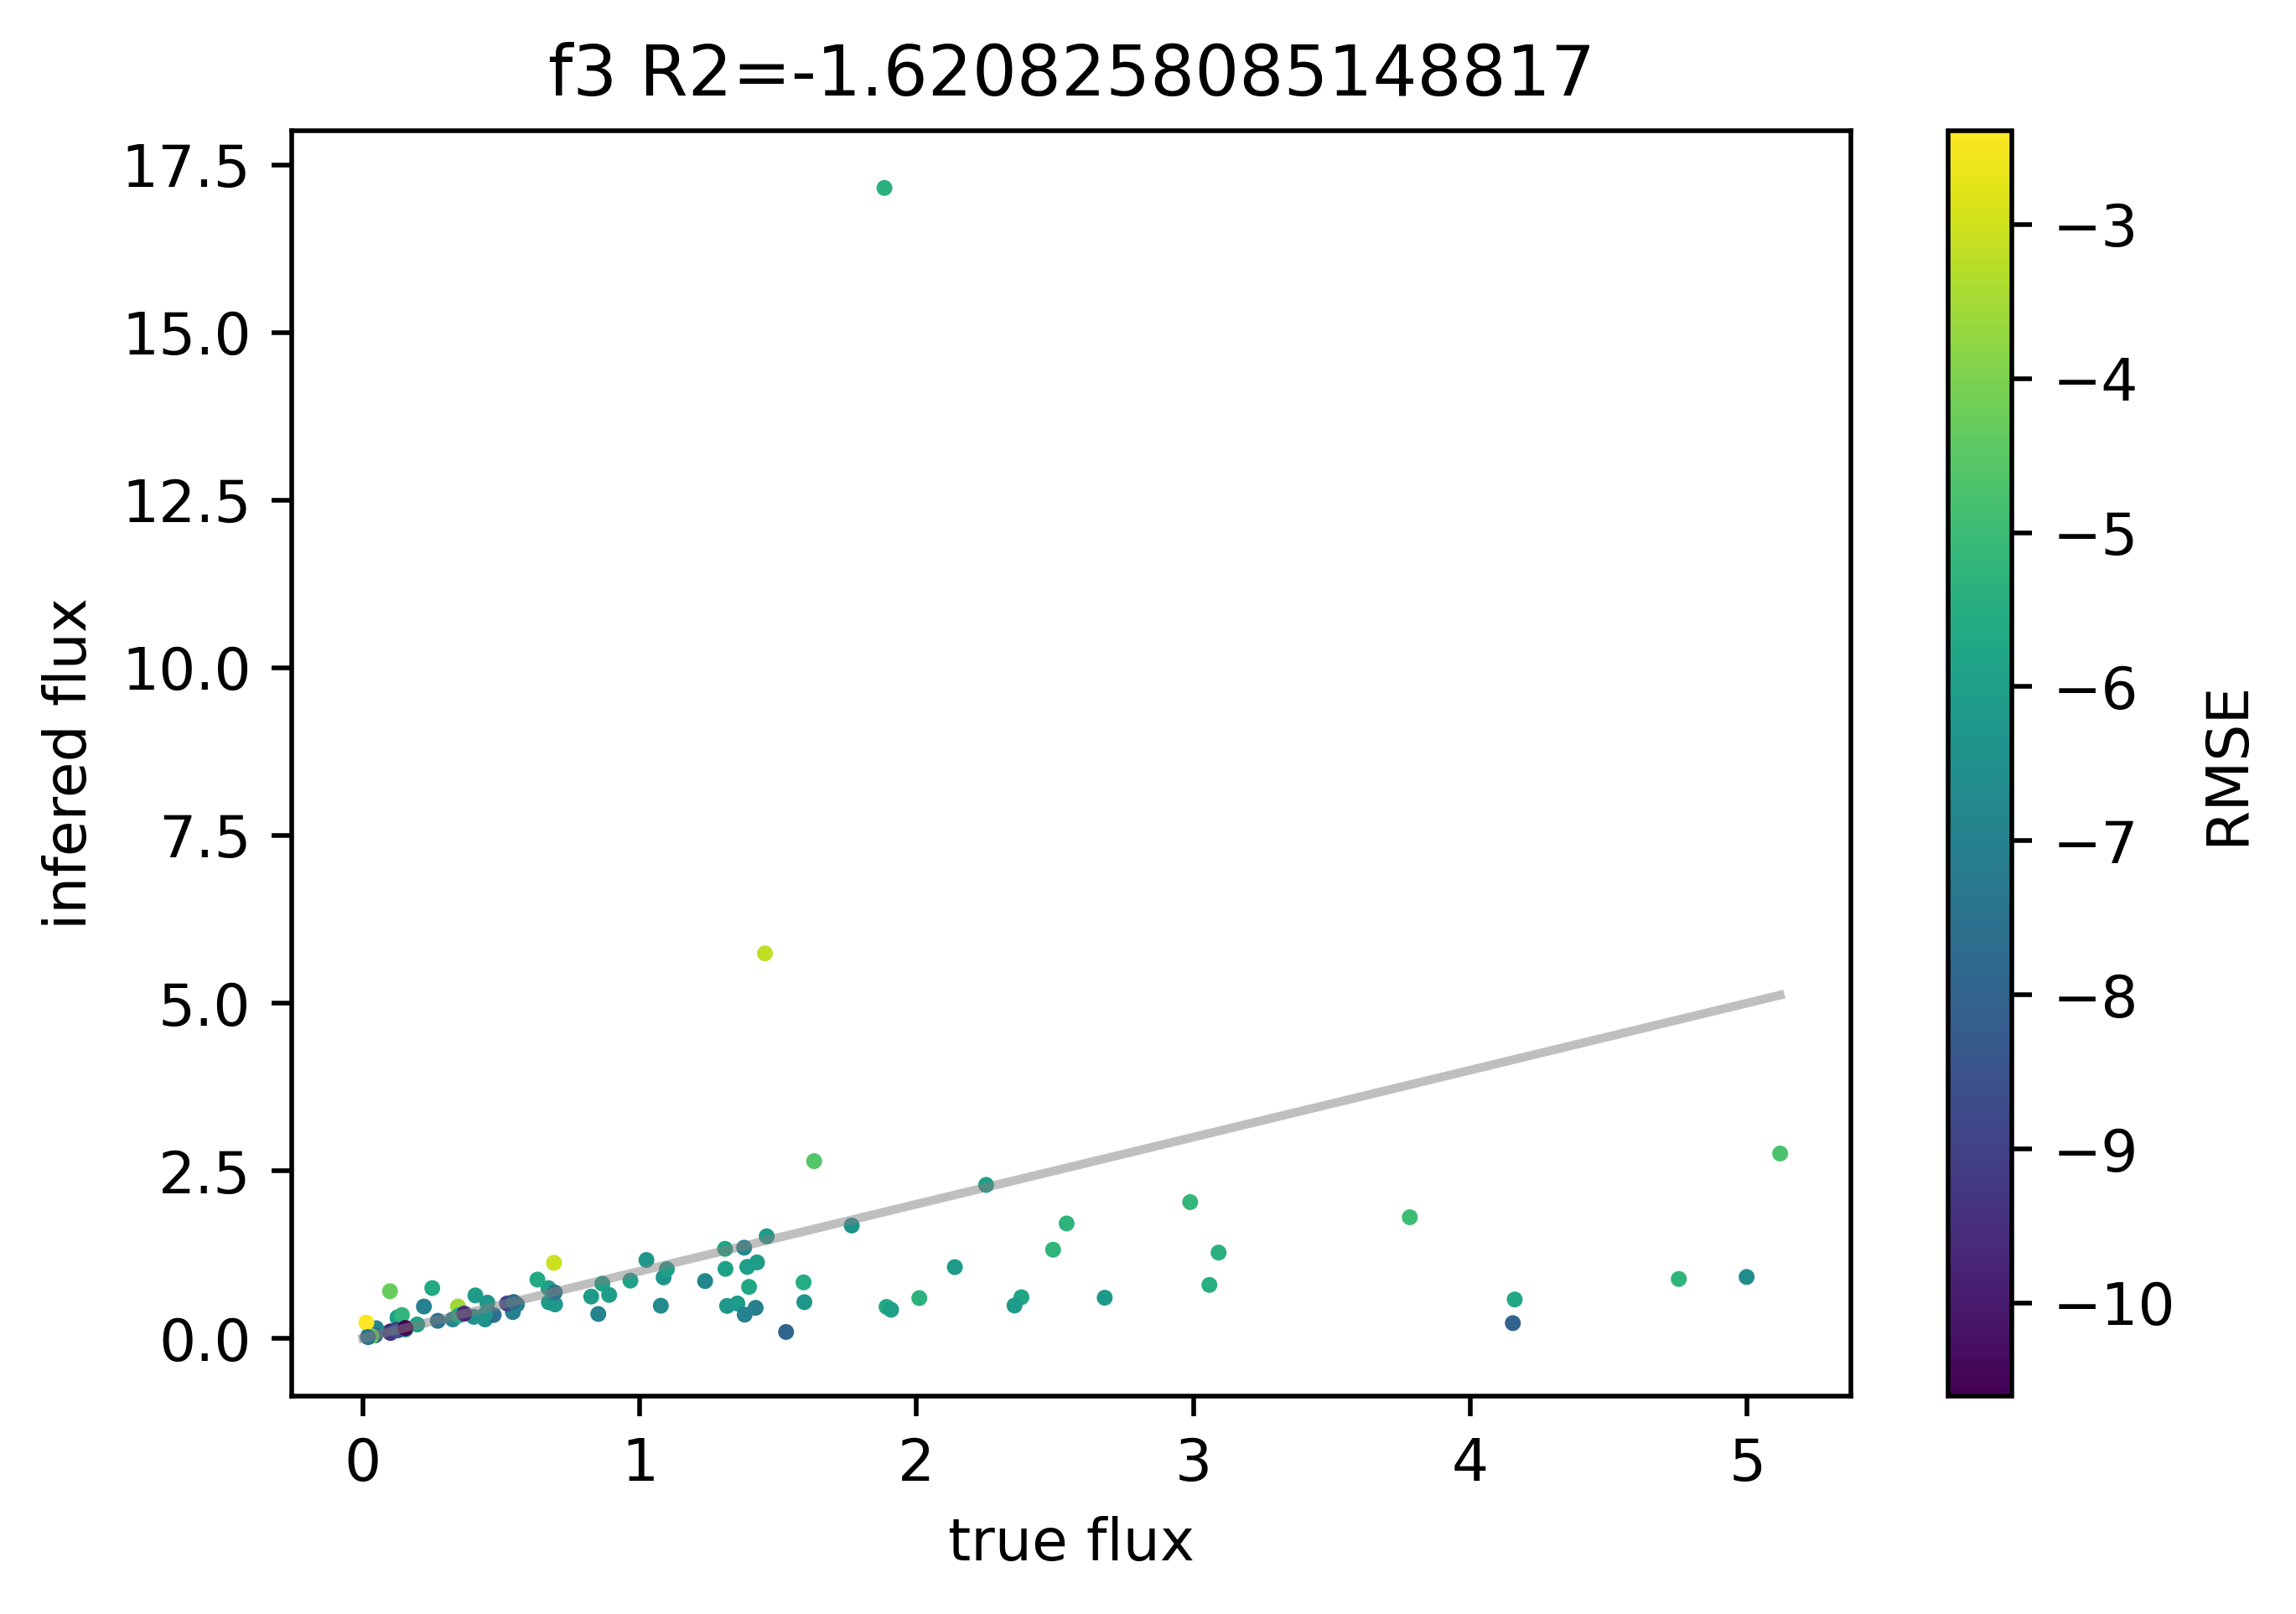

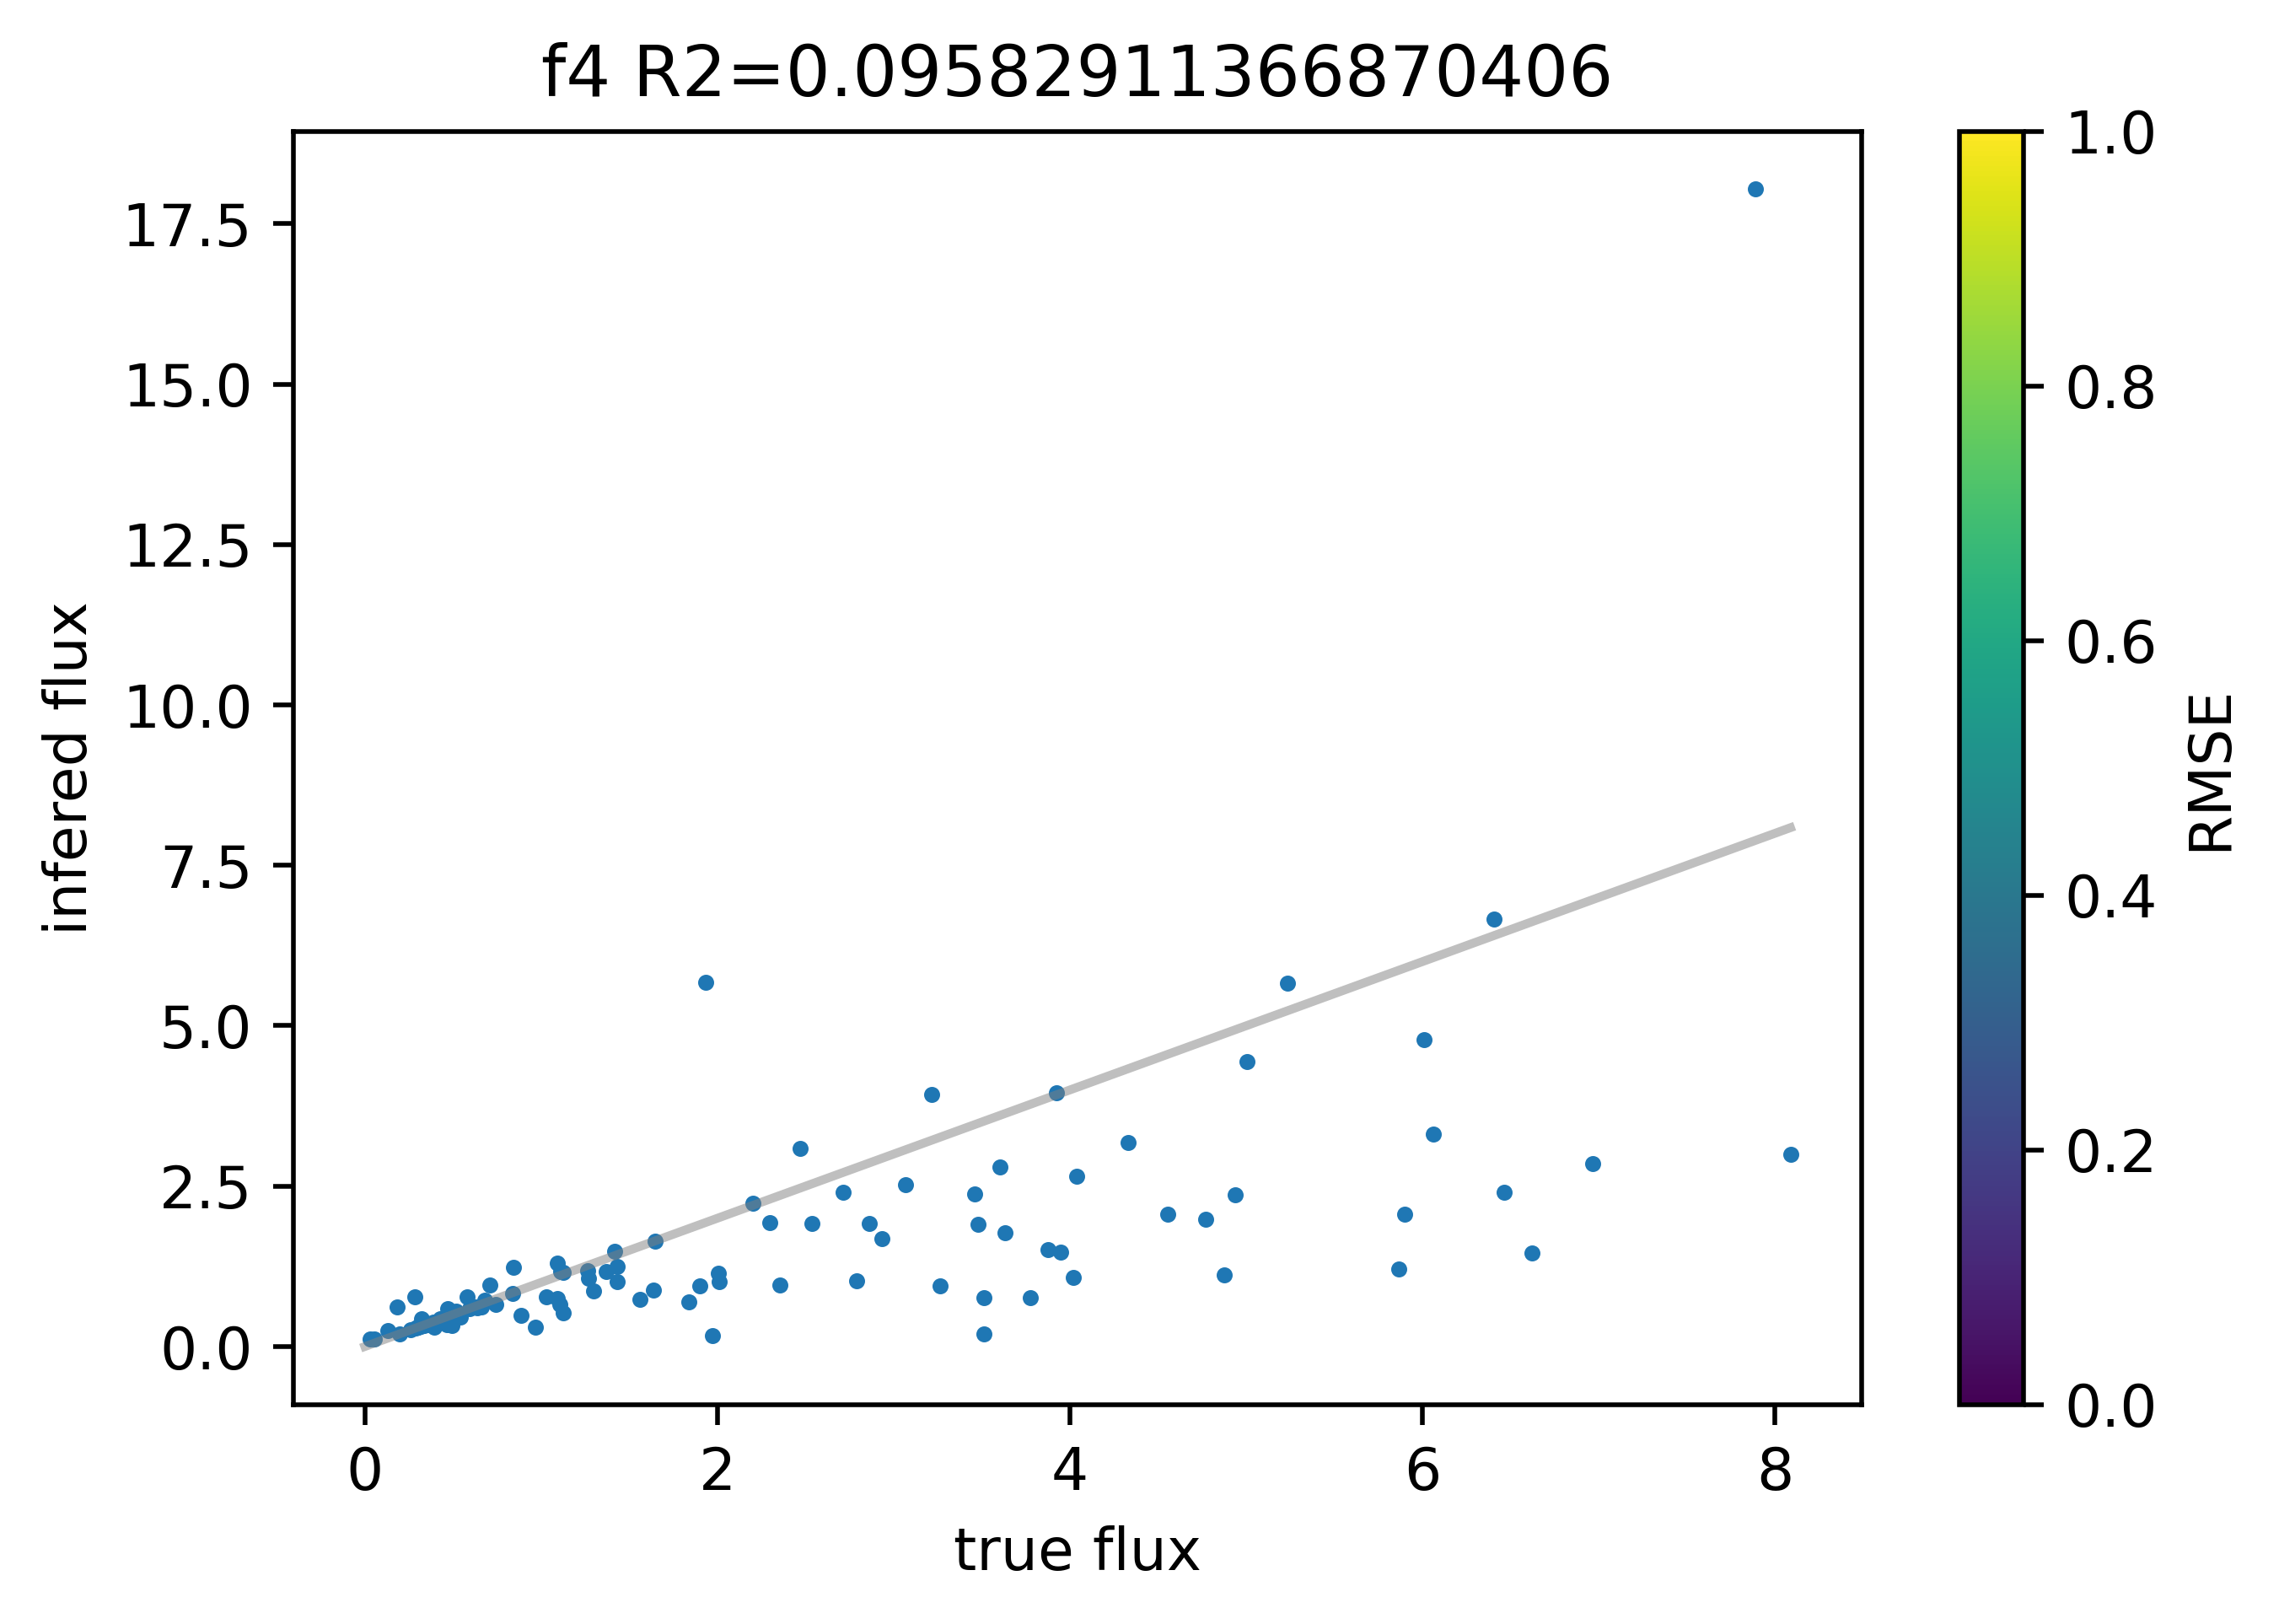

In [21]:
for x in range(pred.shape[1]):
    plt.figure()
    if x != 3: plt.scatter(true[:,x],pred[:,x],s=3,c=np.log10(err[:,x]))
    else: plt.scatter(true[:,x],pred[:,x],s=3)
    plt.plot([0,max(true[:,x])],[0,max(true[:,x])],color="grey",alpha=.5)
    plt.title("f" + str(x+1) + " R2=" + str(r2_score(true[:,x],pred[:,x])))
    #plt.ylim([0,max(true[:,x])])
    plt.colorbar(label="RMSE")
    plt.xlabel("true flux")
    plt.ylabel("infered flux")

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


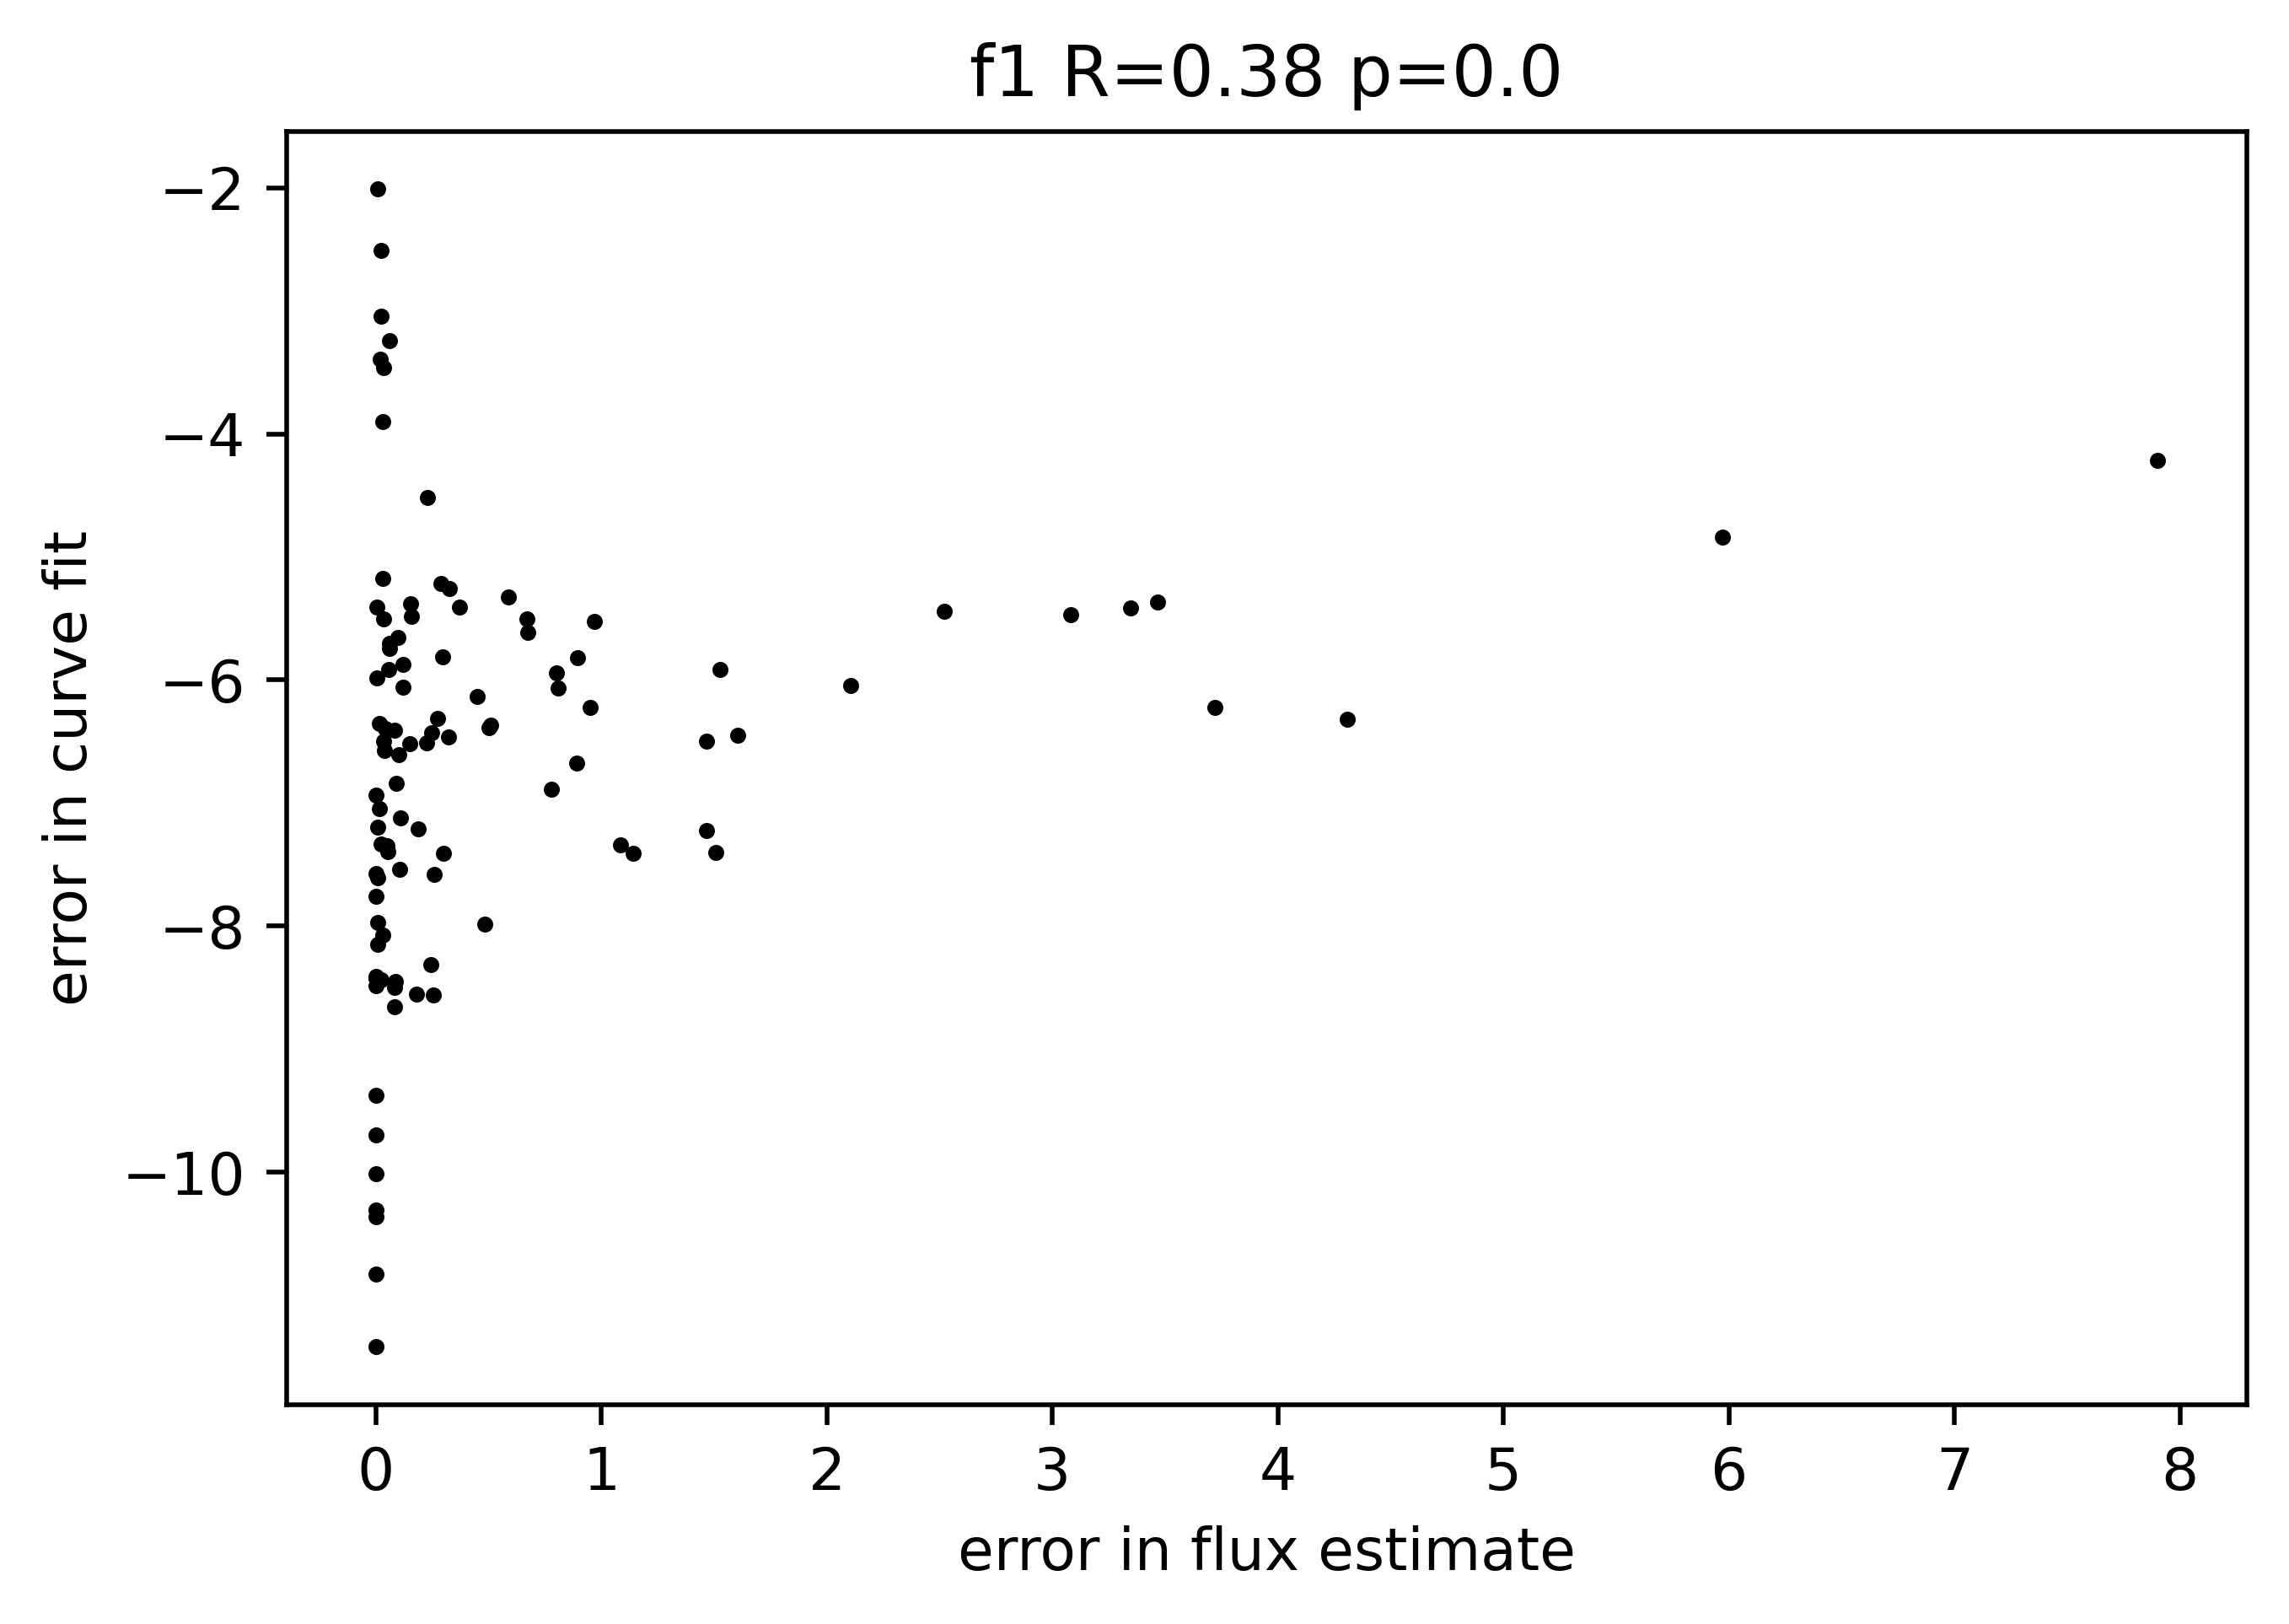

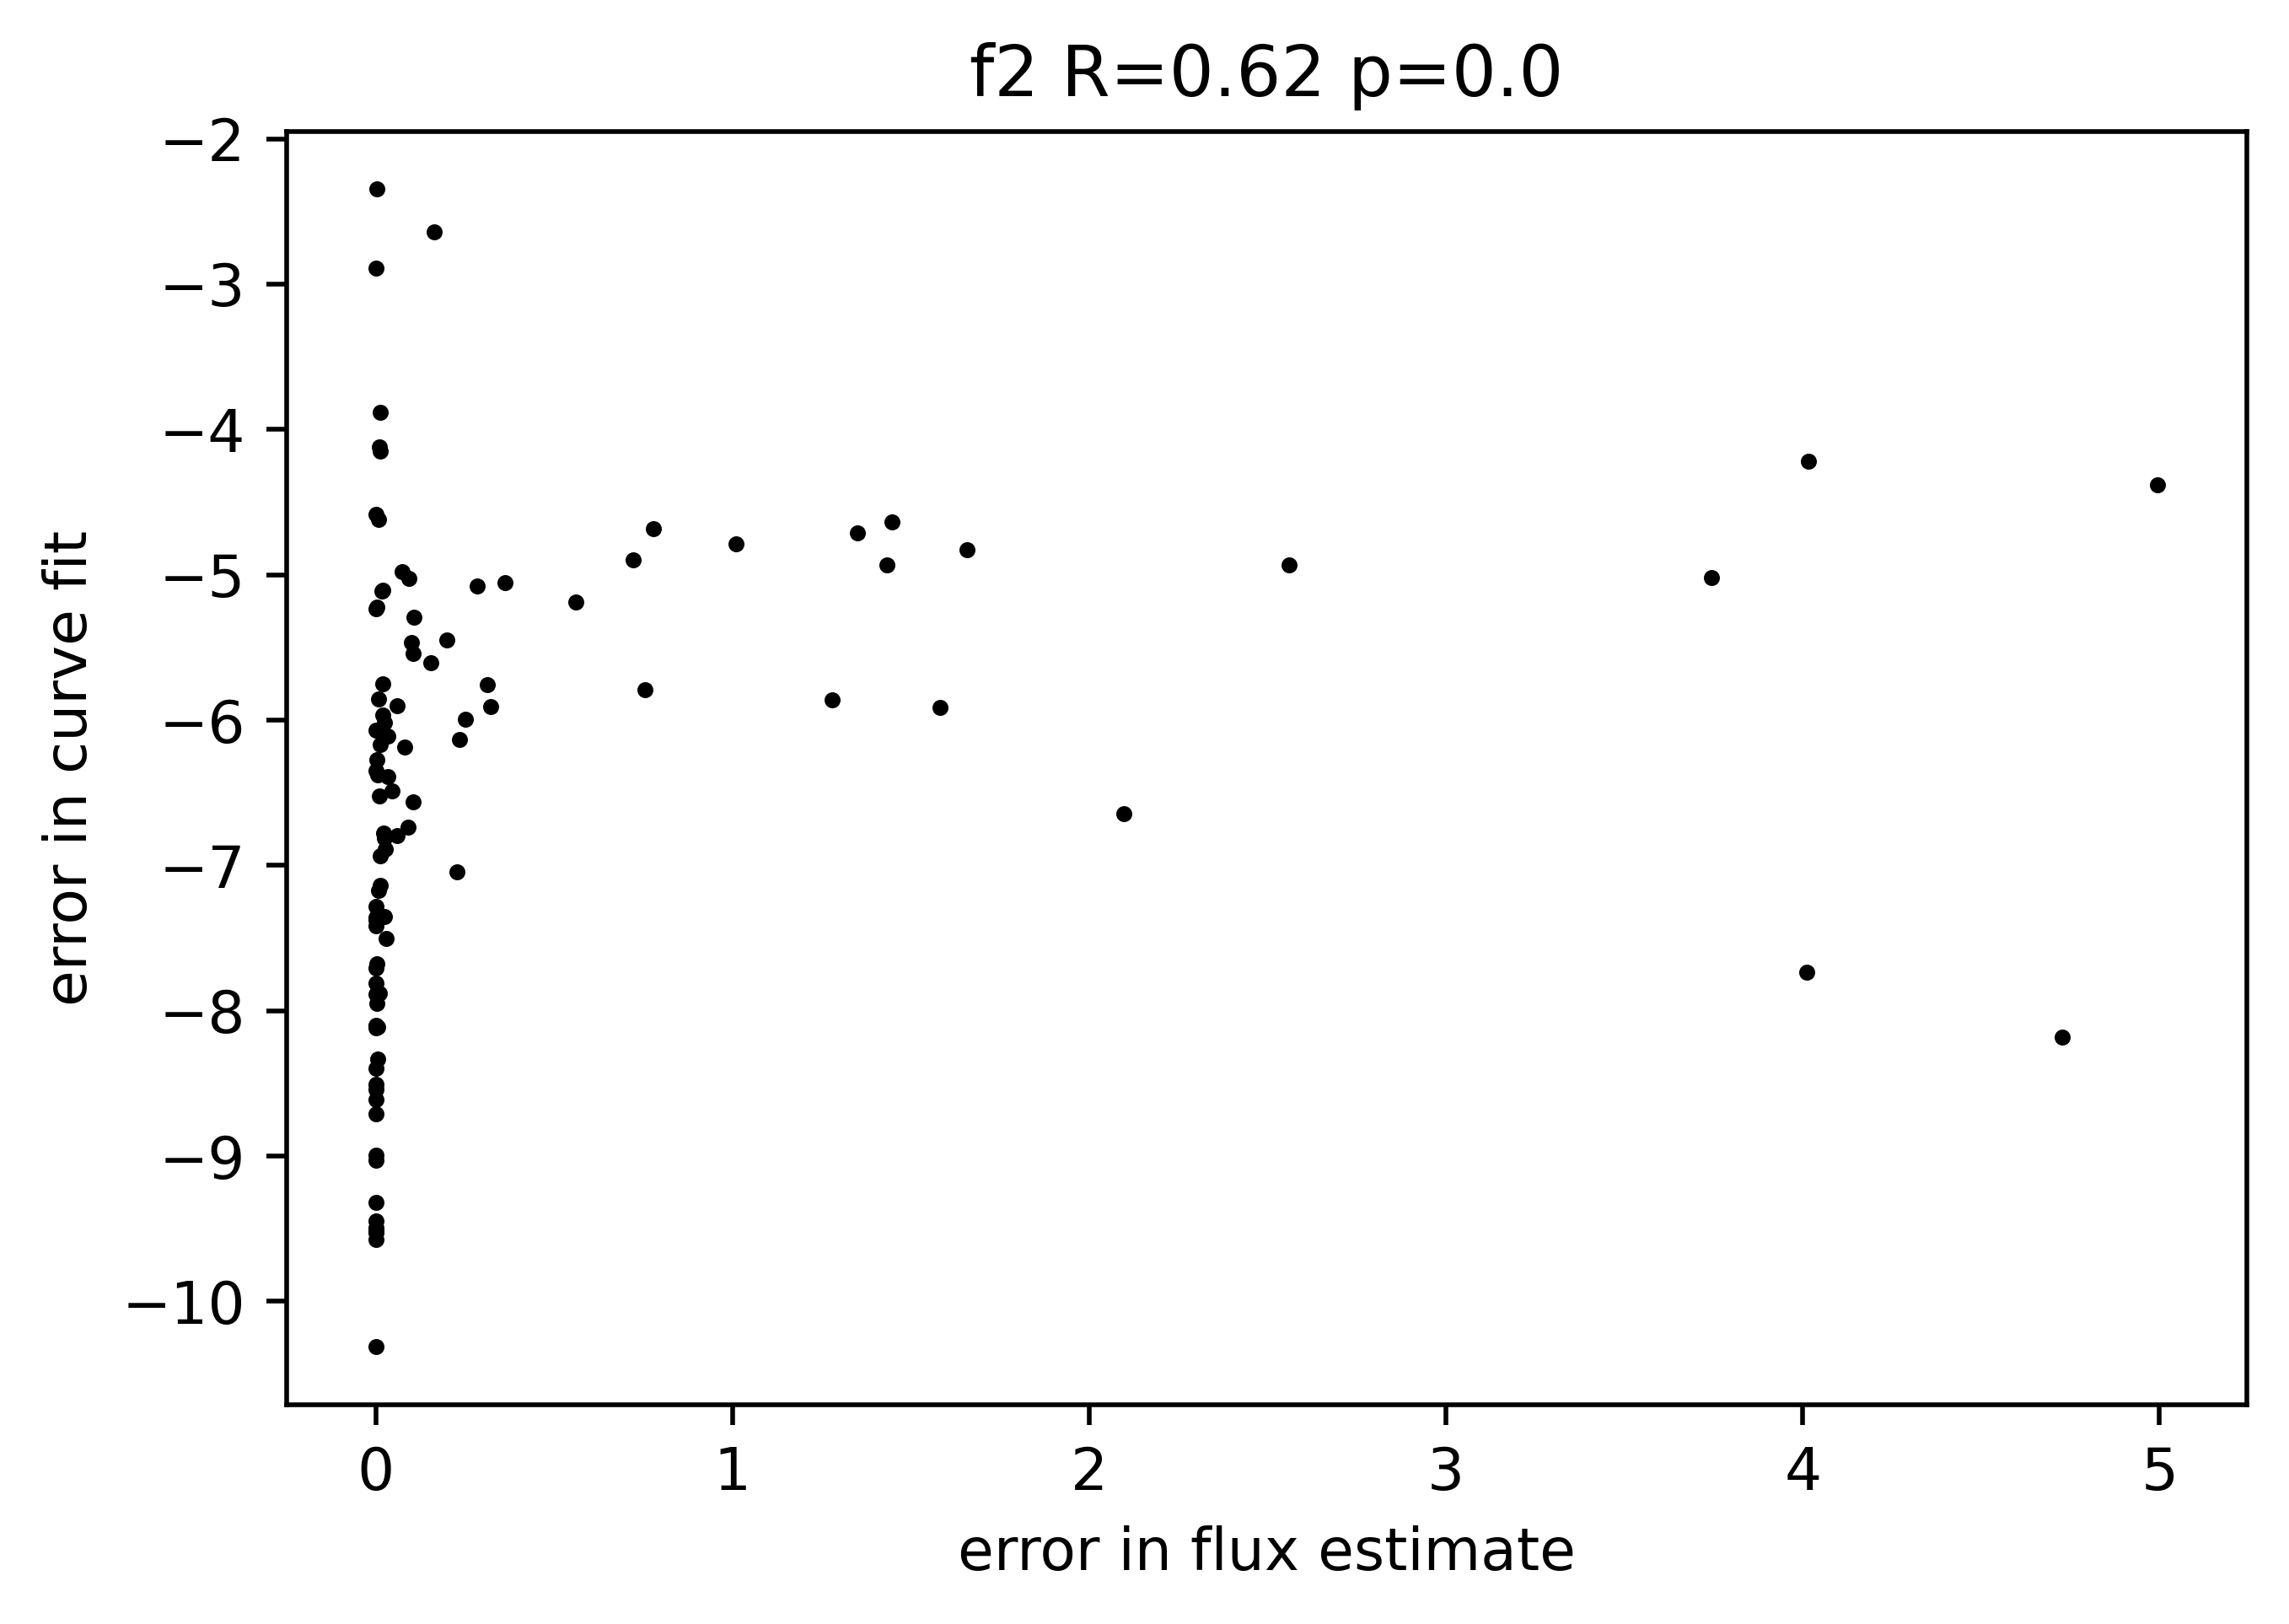

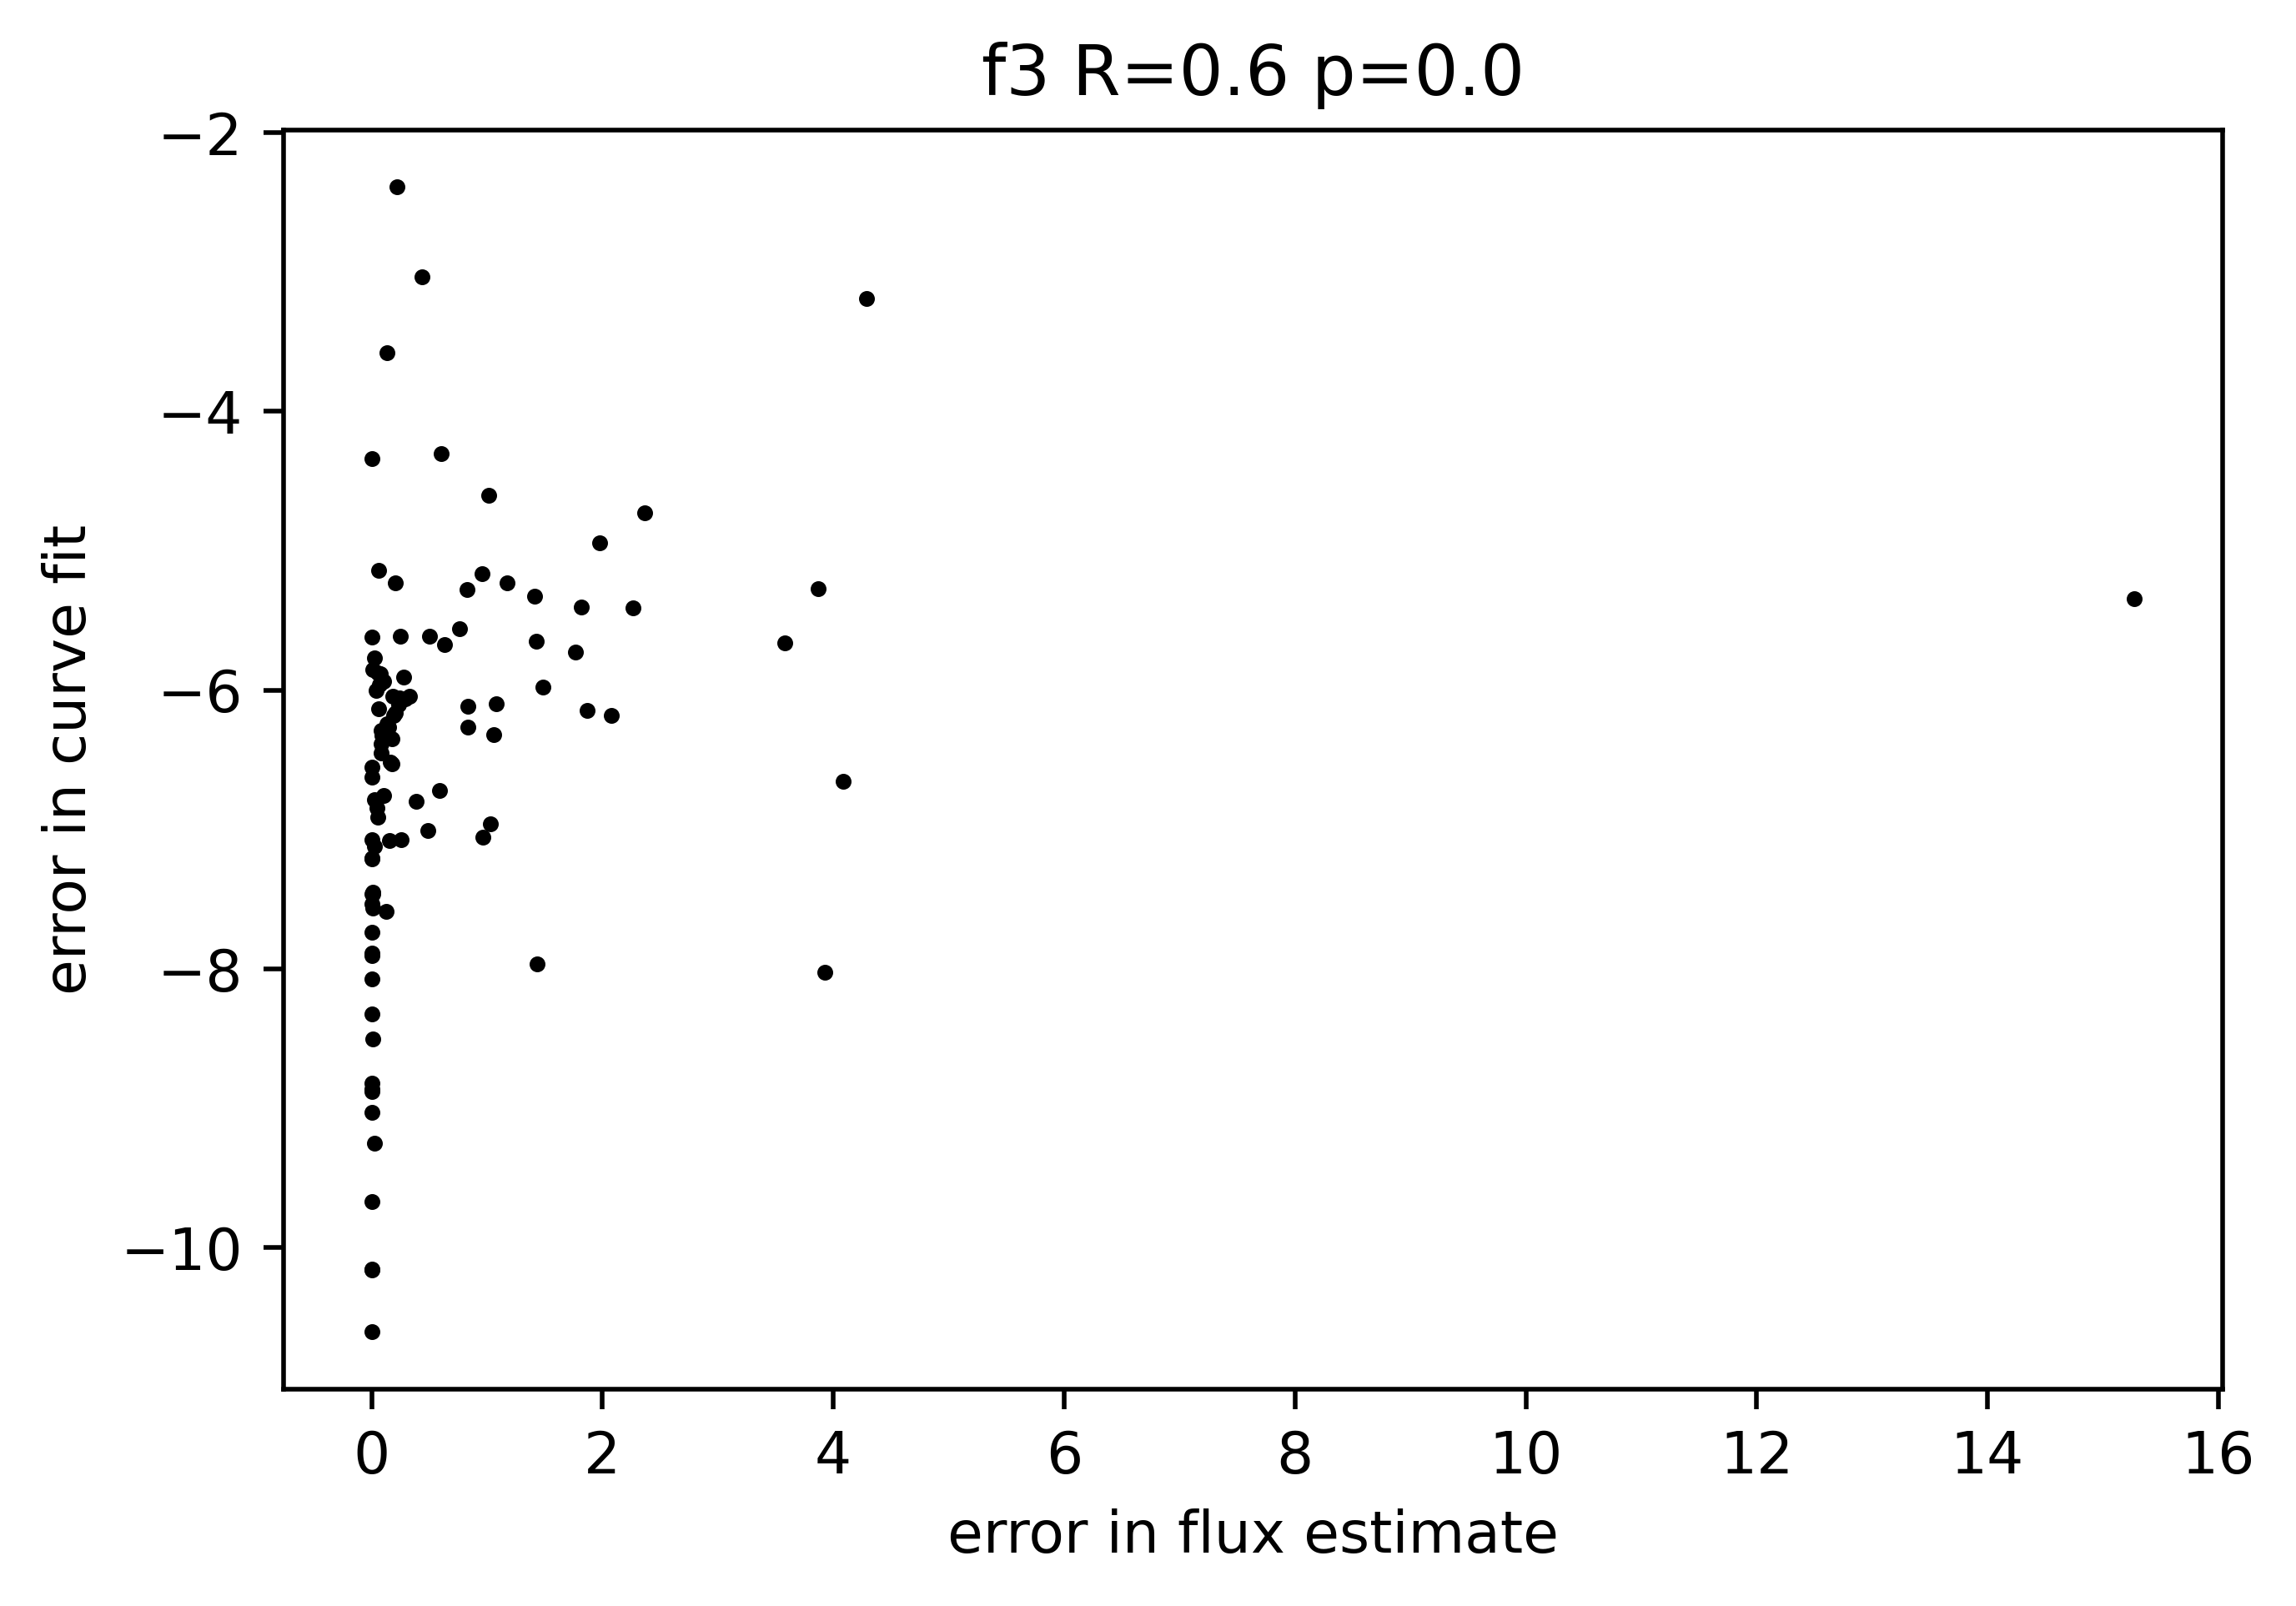

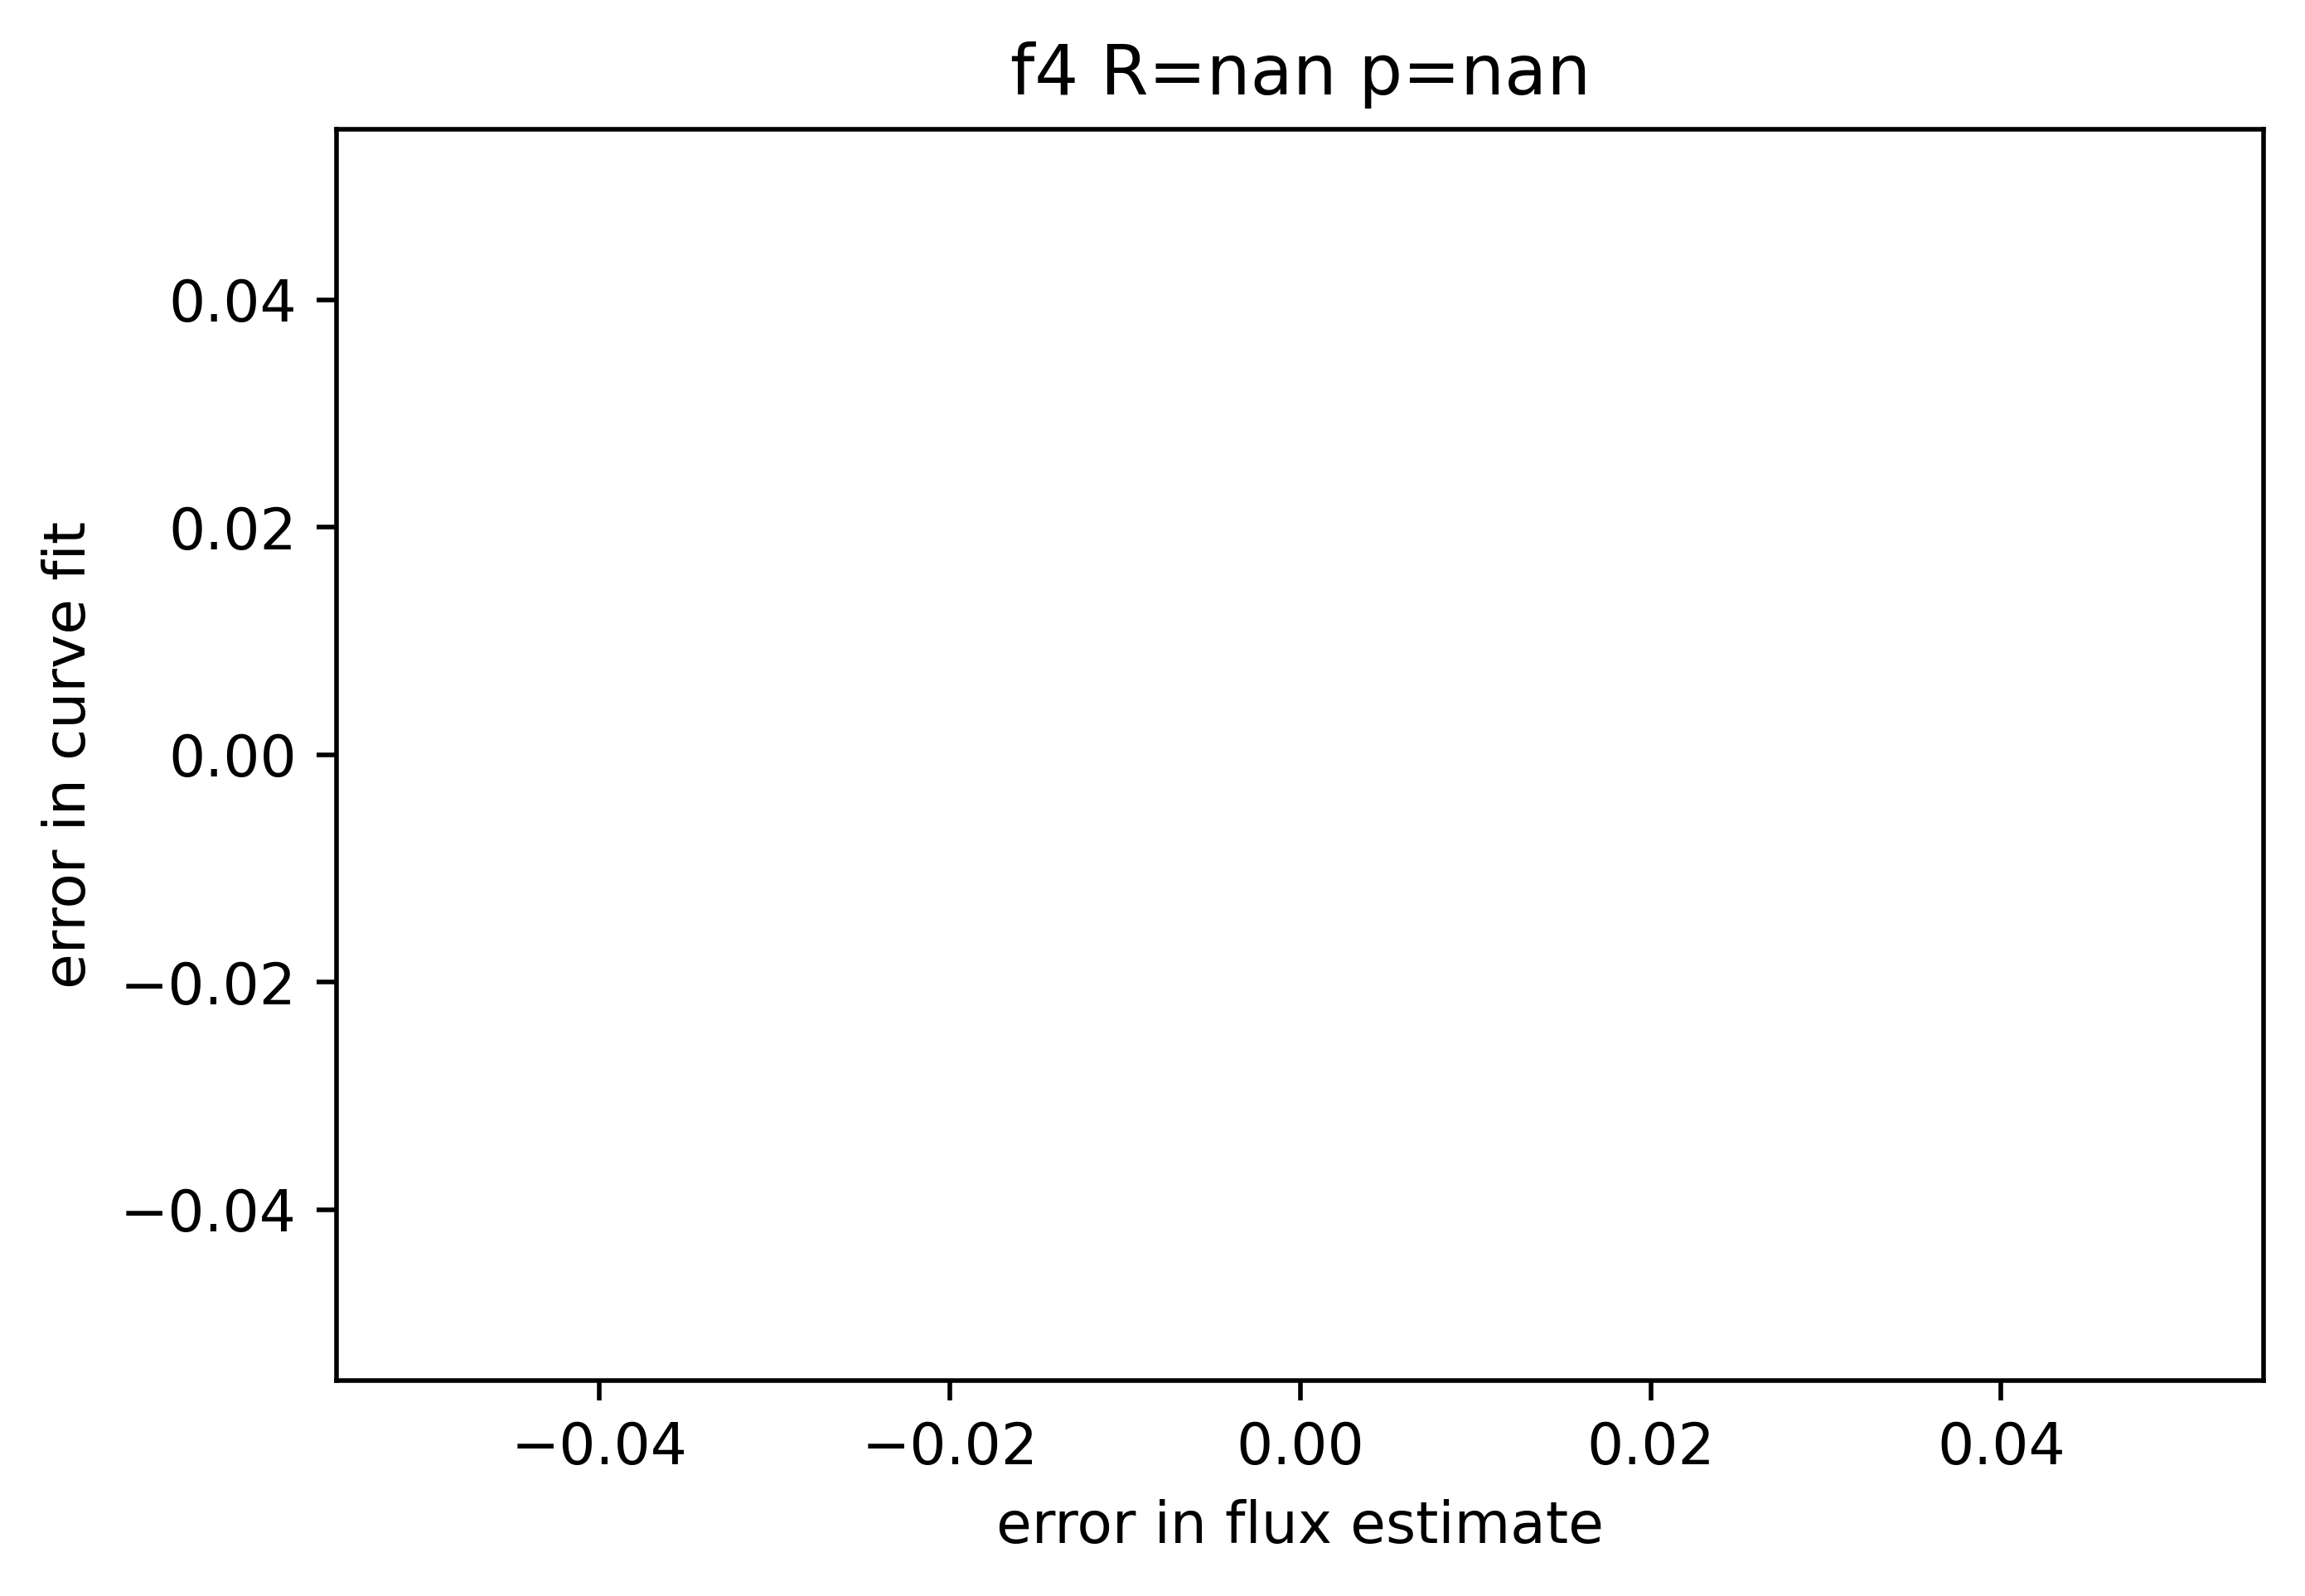

In [22]:
for x in range(pred.shape[1]):
    plt.figure()
    errs = np.abs(true[:,x]-pred[:,x])
    plt.scatter(errs,np.log10(err[:,x]),s=3,color="black")
    stat,p = stats.spearmanr(errs,err[:,x])
    plt.title("f" + str(x+1) + " R=" + str(np.round(stat,2)) + " p=" + str(np.round(p,3)))
    plt.xlabel("error in flux estimate")
    plt.ylabel("error in curve fit")

In [ ]:
true